In [99]:
import numpy as np
import pandas as pd
from numpy import random
import scipy
from scipy import stats
from scipy.stats import norm, t, poisson, binom
import matplotlib
import matplotlib.pyplot as plt
import pylab
from pylab import legend, plot, title, xlabel, ylabel
import seaborn as sns
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
from statsmodels.stats import proportion as ssp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import matplotlib.ticker as mticker


In [2]:
df_app = pd.read_csv('application_data.csv')


In [3]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [4]:
df_app.shape

(307511, 122)

In [5]:
df_prev = pd.read_csv('previous_application.csv')


In [6]:
df_prev.shape

(1670214, 37)

# Data CLeaning on application_dataset

In [7]:
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
# Listing all the column present in all the application_dataset
print(df_app.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [9]:
# check the null values
df_null=df_app.isnull().sum()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_null

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
# Calculate the null values percentagae
df_app_percent=round((100*df_app.isnull().sum()/len(df_app)), 2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_app_percent


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [11]:
# total number of column hhaing null values
print(len(df_app_percent))

122


In [12]:
df_app.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [13]:
# removing null values more than 19%
df_app = df_app.loc[:, df_app.isnull().mean() <= .19]

In [14]:
# Number of column left after removal of the null vaues <=19%
len(df_app.columns)

71

In [15]:
# Checking the data again
round((100*df_app.isnull().sum()/len(df_app)),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

# Data Cleaning on previous_application dataset

In [16]:
# checking the null values in previous_application
df_prev_null=df_prev.isnull().sum()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_prev_null

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [17]:
#percentage of null values of previous_application
df_prev_percent=round((100*df_prev.isnull().sum()/len(df_prev)), 2)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_prev_percent

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [18]:
# total number of columns to prev_application
print(len(df_prev.columns))

37


In [19]:
# Removing nulll values more than 20 %
df_prev=df_prev.loc[:, df_prev.isnull().mean() <=.20]

In [20]:
#number no of column left after removl of null_values <=20%
print(len(df_prev.columns))

23


In [21]:
# Checking the data again
round((100* df_prev.isnull().sum()/len(df_prev)),2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

# Imputing the missing values

Application _dataset

In [22]:
#Imputing the missing value in Name_Type_Suite column
df_app['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [23]:
# Checking the mode value in the name_type_suite
df_app['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [24]:
# filing the name_type_suite with unaccomiped as it is the most occuring vakue
df_app['NAME_TYPE_SUITE'].fillna(value = "Unaccompanied", inplace=True)

C:\Users\mihir\AppData\Local\Temp\ipykernel_2936\2798676571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app['NAME_TYPE_SUITE'].fillna(value = "Unaccompanied", inplace=True)


# Imputing the missing value in  numeriacal colummns

In [25]:
# Checking the missing value in the Numerical columns
df_app.AMT_REQ_CREDIT_BUREAU_HOUR.mean()

0.006402448193930645

In [26]:
# Filling the AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,
#AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR with '0' as most of the values in the columns are '0'
df_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'] = df_app.loc[:,'AMT_REQ_CREDIT_BUREAU_HOUR':'AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

In [27]:
# Checking the AMT_GOODS_PRICE column
df_app.AMT_GOODS_PRICE.mean()

538396.2074288895

In [28]:
# We can impute the mean value of AMT_GOODS_PRICE
df_app['AMT_GOODS_PRICE'].fillna(df_app.AMT_GOODS_PRICE.mean(), inplace = True)

C:\Users\mihir\AppData\Local\Temp\ipykernel_2936\1300360239.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app['AMT_GOODS_PRICE'].fillna(df_app.AMT_GOODS_PRICE.mean(), inplace = True)


In [29]:
# Since the AMT_ANNUITY column has the outlier, so replacing the null values with the mean values would effect our conclusion 
# therefore we use median values

df_app['AMT_ANNUITY'].fillna(df_app.AMT_ANNUITY.median(),inplace=True)

C:\Users\mihir\AppData\Local\Temp\ipykernel_2936\585507423.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app['AMT_ANNUITY'].fillna(df_app.AMT_ANNUITY.median(),inplace=True)


In [30]:
# Rechecking the application_dataset for the NULL values
round((100*df_app.isnull().sum()/len(df_app)),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

# Checking the data-types of the columns

In [31]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [32]:
# Converting the data types of some of the columns that should not be float data-type
df_app['DAYS_REGISTRATION'] = df_app['DAYS_REGISTRATION'].astype(int, errors='ignore')

df_app['CNT_FAM_MEMBERS'] = df_app['CNT_FAM_MEMBERS'].astype(int, errors='ignore')

df_app['OBS_30_CNT_SOCIAL_CIRCLE'] = df_app['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')

df_app['DEF_30_CNT_SOCIAL_CIRCLE'] = df_app['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')

df_app['OBS_60_CNT_SOCIAL_CIRCLE'] = df_app['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')

df_app['DEF_60_CNT_SOCIAL_CIRCLE'] = df_app['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_app['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_DAY' ] = df_app['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_app['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_MON'] = df_app['AMT_REQ_CREDIT_BUREAU_MON'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_QRT'] = df_app['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int, errors='ignore')

df_app['AMT_REQ_CREDIT_BUREAU_YEAR'] =  df_app['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int, errors='ignore')

# Removing the unwanted Column

In [33]:
#We will remove the unwanted columns from the application_dataset

unwanted = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
            'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
            'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 
            'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11', 
            'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
            'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']


df_app.drop(labels=unwanted, axis=1, inplace=True)

In [34]:
df_app.shape

(307511, 42)

# Checking the gender and organization for any error

In [35]:
# check the gender column first
df_app.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [36]:
#Replscing the'XNA' values with the Females as majority are females & it wont affeect analysis
df_app.CODE_GENDER.replace(to_replace = 'XNA' , value='F', inplace = True)

C:\Users\mihir\AppData\Local\Temp\ipykernel_2936\1502579019.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_app.CODE_GENDER.replace(to_replace = 'XNA' , value='F', inplace = True)


In [37]:
df_app.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [38]:
# Check the organixzation column second
df_app.ORGANIZATION_TYPE.value_counts()



ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [39]:
# hence the droping the rows total 55374 have 'xna' values in the organnization type column
df_app = df_app.drop(df_app.loc[df_app['ORGANIZATION_TYPE'] == 'XNA'].index)

In [40]:
df_app.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

# Creating bins for the AMT_INCOME_TOTAL

In [122]:
# Creating bins for the Income column i.e "AMT_INCOME_TOTAL"

bins_income =  [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,
             700000,750000,800000,850000,900000,950000,1000000]

slots_income = ['0-50000','50000-100000','100000-150000','150000-200000','200000-250000','250000-300000','300000-350000',
                '350000-400000','400000-450000','450000-500000','500000-550000','550000-600000','600000-650000',
                '650000-700000','700000-750000','750000-800000','800000-850000','850000-900000',
                '900000-950000','950000 and above']

df_app['AMT_INCOME_TOTAL_BINNED'] = pd.cut(df_app['AMT_CREDIT'],bins=bins_income,labels=slots_income,right=True)

# Checking or the imbalance ratio


In [123]:
# Looking into the Target DATA

df_app.TARGET.value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

In [124]:
#Have a look into the target data
df_app.TARGET.value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

C:\Users\mihir\AppData\Local\Temp\ipykernel_2936\3710987872.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_app, x='TARGET', palette='coolwarm')


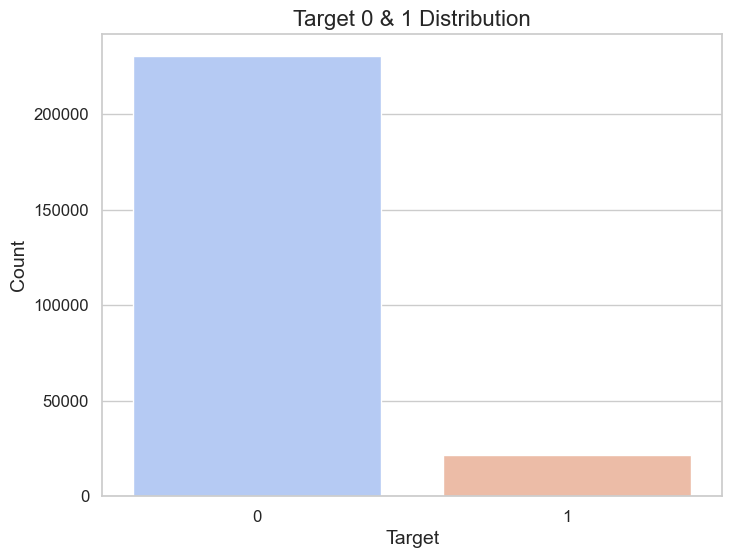

In [125]:
#Plotting data for target
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_app, x='TARGET', palette='coolwarm')

plt.title('Target 0 & 1 Distribution', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In these graph it is given thst target 0 is greater than 1

In [126]:
# Checking the IMBALANCE Ratio for  the target Column\

target_0 = df_app.loc[df_app["TARGET"]==0]
target_1 = df_app.loc[df_app["TARGET"]==1]

print(round(len(target_0)/len(target_1),2))

10.55


In [127]:
target_0.shape

(230302, 43)

In [128]:
target_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230302 entries, 1 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   230302 non-null  int64   
 1   TARGET                       230302 non-null  int64   
 2   NAME_CONTRACT_TYPE           230302 non-null  object  
 3   CODE_GENDER                  230302 non-null  object  
 4   FLAG_OWN_CAR                 230302 non-null  object  
 5   FLAG_OWN_REALTY              230302 non-null  object  
 6   CNT_CHILDREN                 230302 non-null  int64   
 7   AMT_INCOME_TOTAL             230302 non-null  float64 
 8   AMT_CREDIT                   230302 non-null  float64 
 9   AMT_ANNUITY                  230302 non-null  float64 
 10  AMT_GOODS_PRICE              230302 non-null  float64 
 11  NAME_TYPE_SUITE              230302 non-null  object  
 12  NAME_INCOME_TYPE             230302 non-null  obj

In [129]:
target_1.shape

(21835, 43)

In [130]:
target_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21835 entries, 0 to 307509
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   21835 non-null  int64   
 1   TARGET                       21835 non-null  int64   
 2   NAME_CONTRACT_TYPE           21835 non-null  object  
 3   CODE_GENDER                  21835 non-null  object  
 4   FLAG_OWN_CAR                 21835 non-null  object  
 5   FLAG_OWN_REALTY              21835 non-null  object  
 6   CNT_CHILDREN                 21835 non-null  int64   
 7   AMT_INCOME_TOTAL             21835 non-null  float64 
 8   AMT_CREDIT                   21835 non-null  float64 
 9   AMT_ANNUITY                  21835 non-null  float64 
 10  AMT_GOODS_PRICE              21835 non-null  float64 
 11  NAME_TYPE_SUITE              21835 non-null  object  
 12  NAME_INCOME_TYPE             21835 non-null  object  
 13  NAME_

# Univariate Analysis

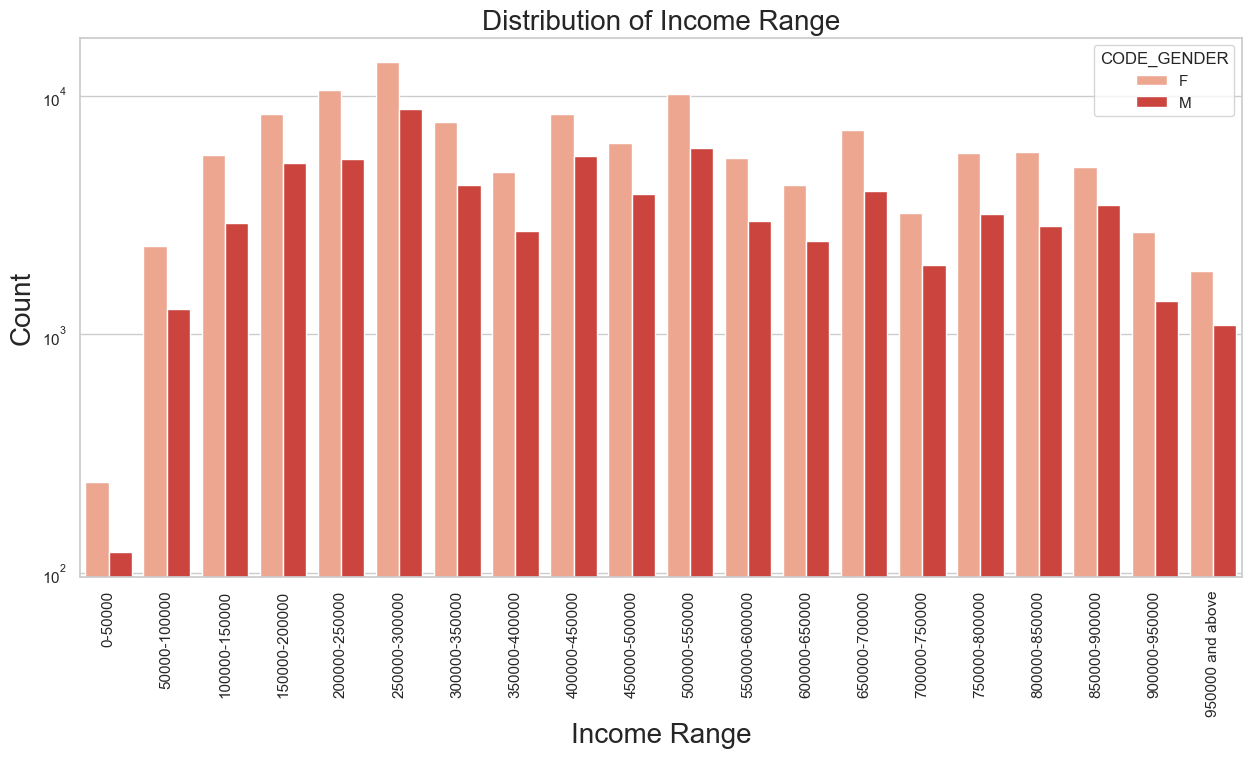

In [131]:
plt.figure(figsize=(15,7))

sns.countplot(data=target_0, x ='AMT_INCOME_TOTAL_BINNED', hue = 'CODE_GENDER',palette = 'Reds')

plt.title('Distribution of Income Range',fontsize=20)
plt.xlabel('Income Range',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=90)
plt.yscale('log')

plt.show()

Conclusion From the Graph

1. Income range from 250000-300000 is having the more Numbers of credits
2. Both males and females show a relatively even distribution across various income ranges.
3. it seems that the females are more than males in having the credit for range 250000 - 300000


In [132]:
df_app['AMT_INCOME_TOTAL_BINNED'].head(10)

0     400000-450000
1               NaN
2     100000-150000
3     300000-350000
4     500000-550000
5     450000-500000
6               NaN
7               NaN
9     400000-450000
10    650000-700000
Name: AMT_INCOME_TOTAL_BINNED, dtype: category
Categories (20, object): ['0-50000' < '50000-100000' < '100000-150000' < '150000-200000' ... '800000-850000' < '850000-900000' < '900000-950000' < '950000 and above']

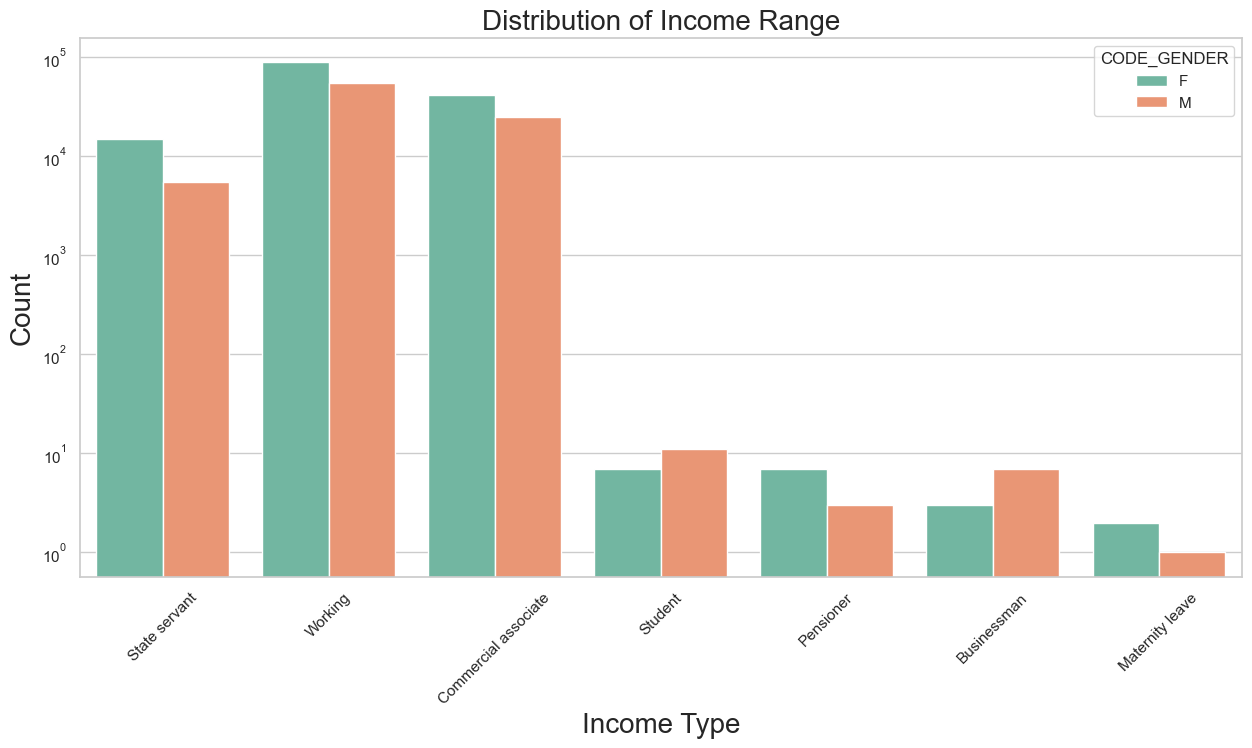

In [133]:
#Plotting for the various Income Types across various Gender

plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

sns.countplot(data=target_0, x ='NAME_INCOME_TYPE', hue = 'CODE_GENDER',palette = 'Set2')

plt.title('Distribution of Income Range',fontsize=20)
plt.xlabel('Income Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

Conclusion From the Graph
1. It seems that working Women have most Credit Score
2. It seems that 'State Servant' Working and 'Commercial Assosiate' have more more credits counts compared to each others
3. It seems that Maternity Leave has less Credit in comparision to others

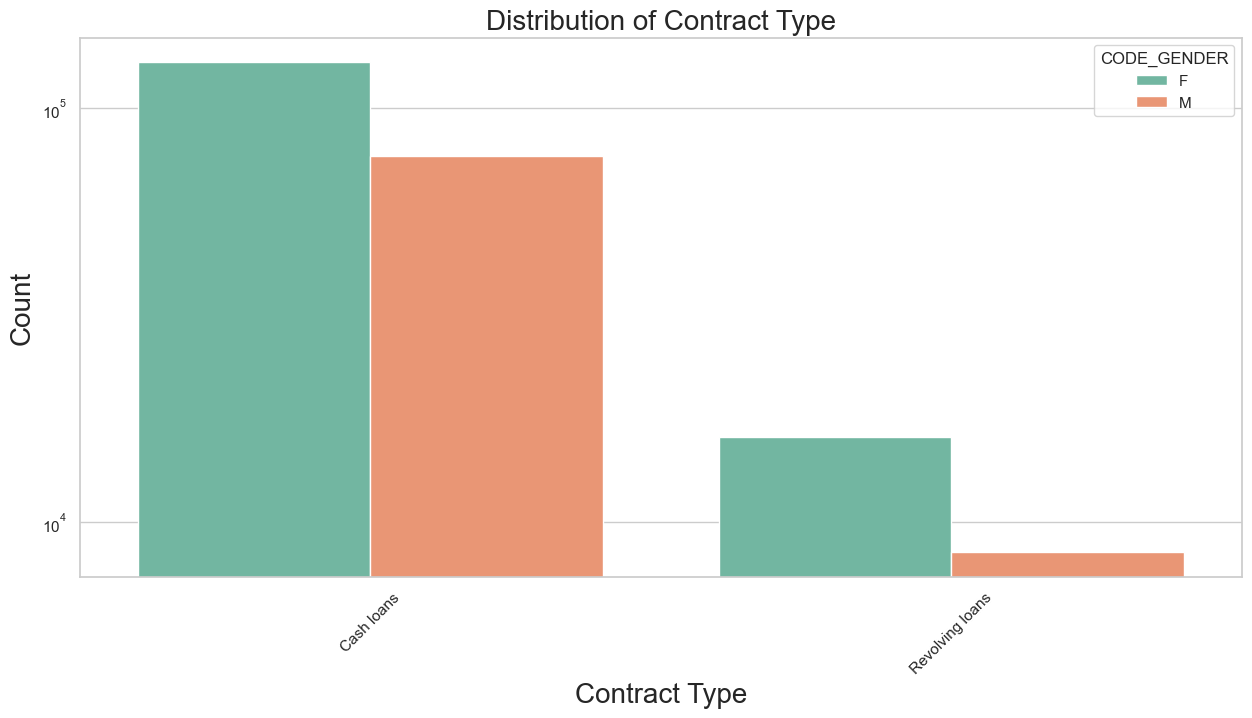

In [134]:
# PLotting the Contract type across various Genders

plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

sns.countplot(data=target_0, x ='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER',palette = 'Set2')

plt.title('Distribution of Contract Type',fontsize=20)
plt.xlabel('Contract Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

Conclusion From the Graph

1. It seems that cash loans is having higher number of credits than 'Revolving Loans' Contract Type
2. Also, Femlaes applied for more credits

C:\Users\mihir\AppData\Local\Temp\ipykernel_2936\1201798436.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=target_0, y ='ORGANIZATION_TYPE', order = target_0['ORGANIZATION_TYPE'].value_counts().index,palette ='cool')


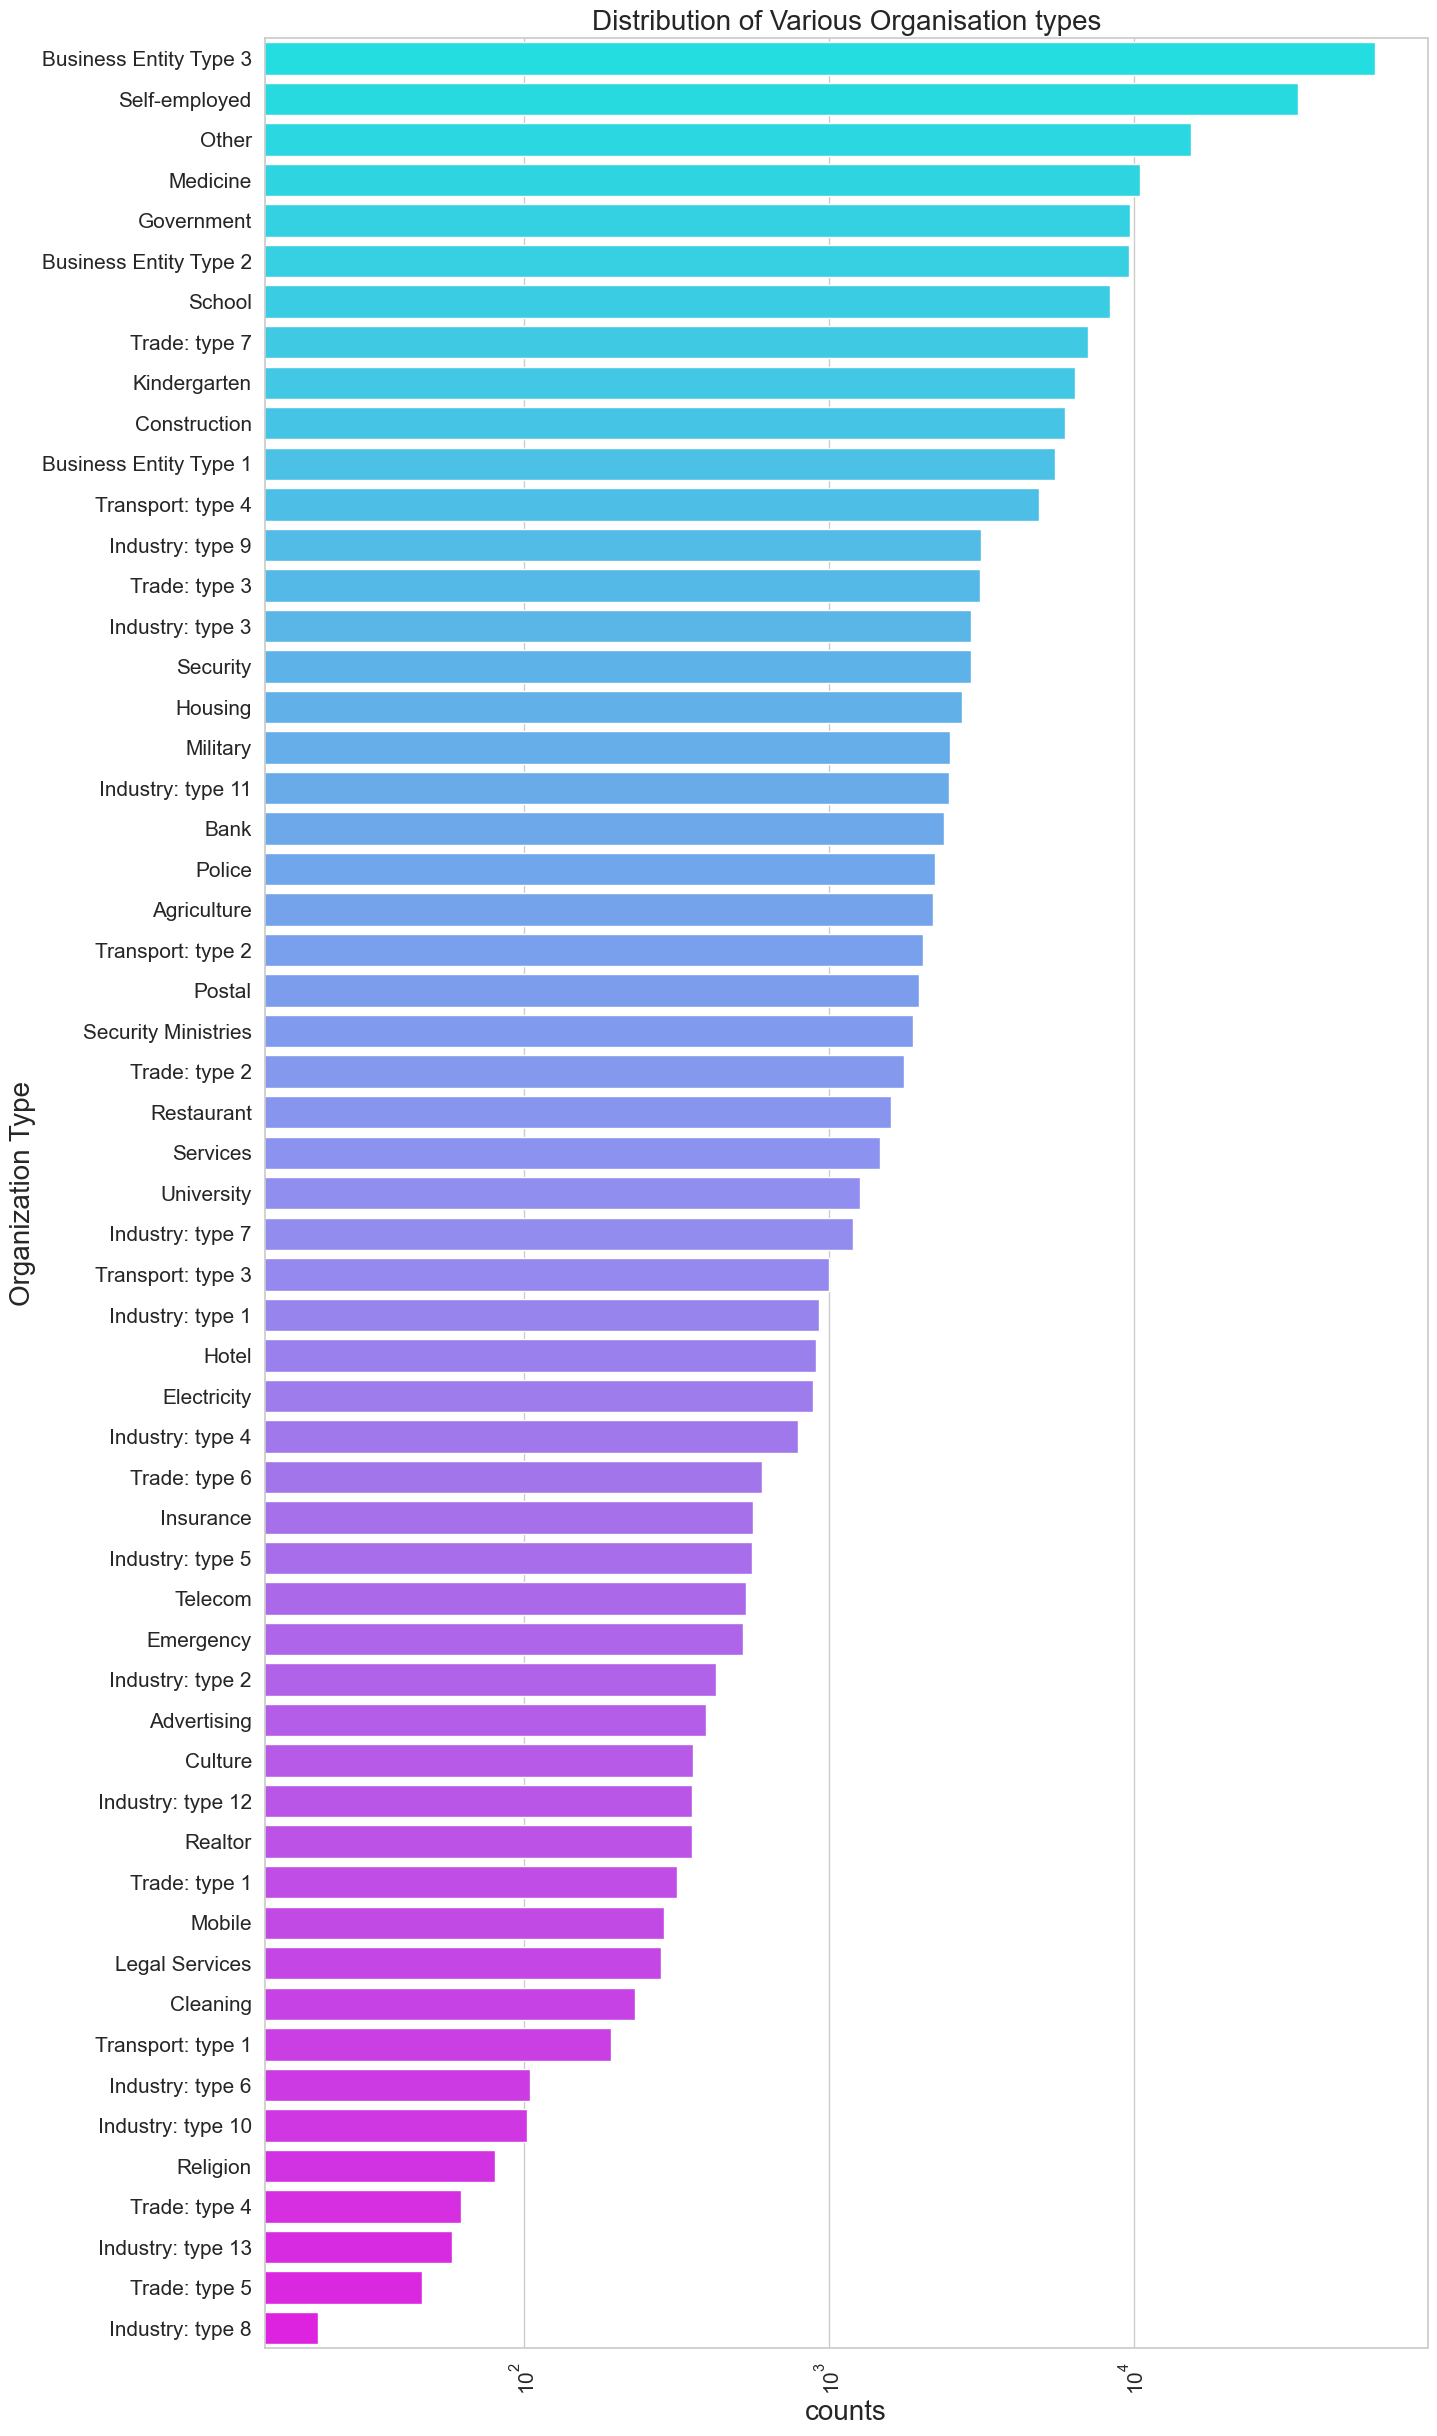

In [135]:
# PLotting for the various Organisation Types

plt.figure(figsize=(15,30))
sns.set_style('whitegrid')

sns.countplot(data=target_0, y ='ORGANIZATION_TYPE', order = target_0['ORGANIZATION_TYPE'].value_counts().index,palette ='cool')

plt.title('Distribution of Various Organisation types',fontsize=20)
plt.xlabel('counts',fontsize=20)
plt.ylabel('Organization Type',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=90,fontsize=15)

plt.xscale('log')

plt.show()

Conclusion from the graph
1. Clients which have applied for the credits are from most of the organisation type 'Business entity Type-3',Self-Employed: 'Other', 'Medicine'
and 'Goverment'
2. Less Clients are from  Industry type 8, type 6, type 10 religion  and trade type 5 and type4

# Plotting for those who have difficulty in re-paying the loan i.e Target==1

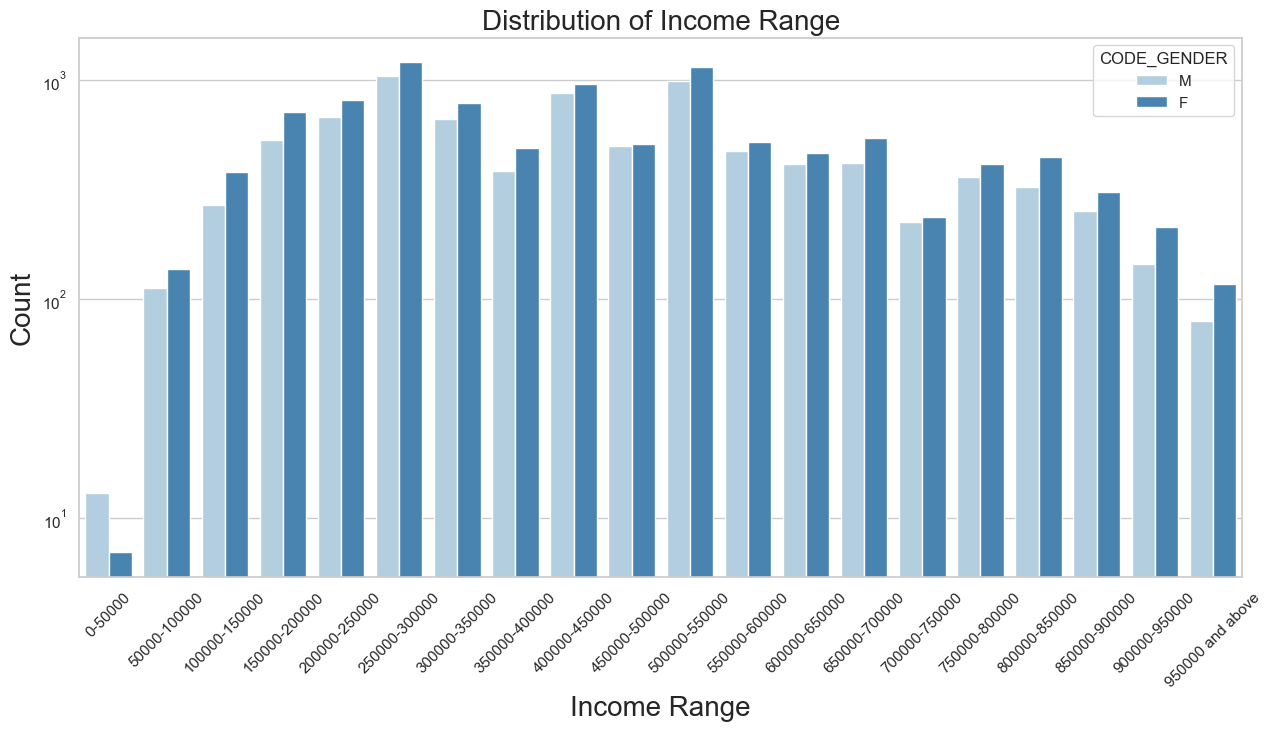

In [136]:
# Plotting for Income Range across the 

plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
sns.countplot(data=target_1, x ='AMT_INCOME_TOTAL_BINNED', hue = 'CODE_GENDER',palette = 'Blues')

plt.title('Distribution of Income Range',fontsize=20)
plt.xlabel('Income Range',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

1. Income counts are consistently distributed across various ranges, with the highest frequencies occurring in the middle income brackets (e.g.,50,000 to 80,000).

2. Males (represented in darker blue) have slightly higher counts in many of the income ranges, particularly in the upper brackets, while females (in lighter blue) show a similar trend but are generally lower in count.


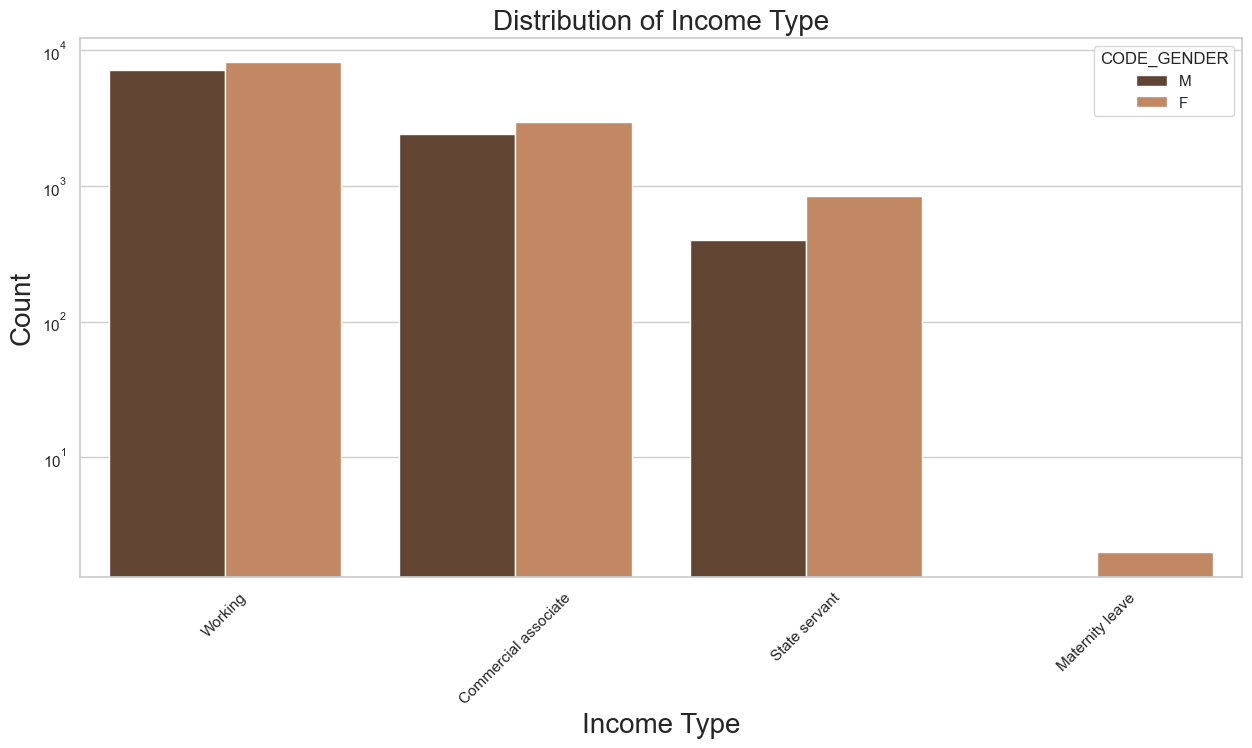

In [137]:
#Plotting For the various Income Type Across various Gender
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

sns.countplot(data=target_1, x ='NAME_INCOME_TYPE', hue = 'CODE_GENDER',palette = 'copper')

plt.title('Distribution of Income Type',fontsize=20)
plt.xlabel('Income Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

## Conclusion from the Graph
1. for Income type 'Working','commercial assosiate' and 'State Servant' the number of credits are higher than others i.e 'Maternity Leave'
2. For this Females have more credits than males
3. Less number of credits for Income  'Maternity Leave'

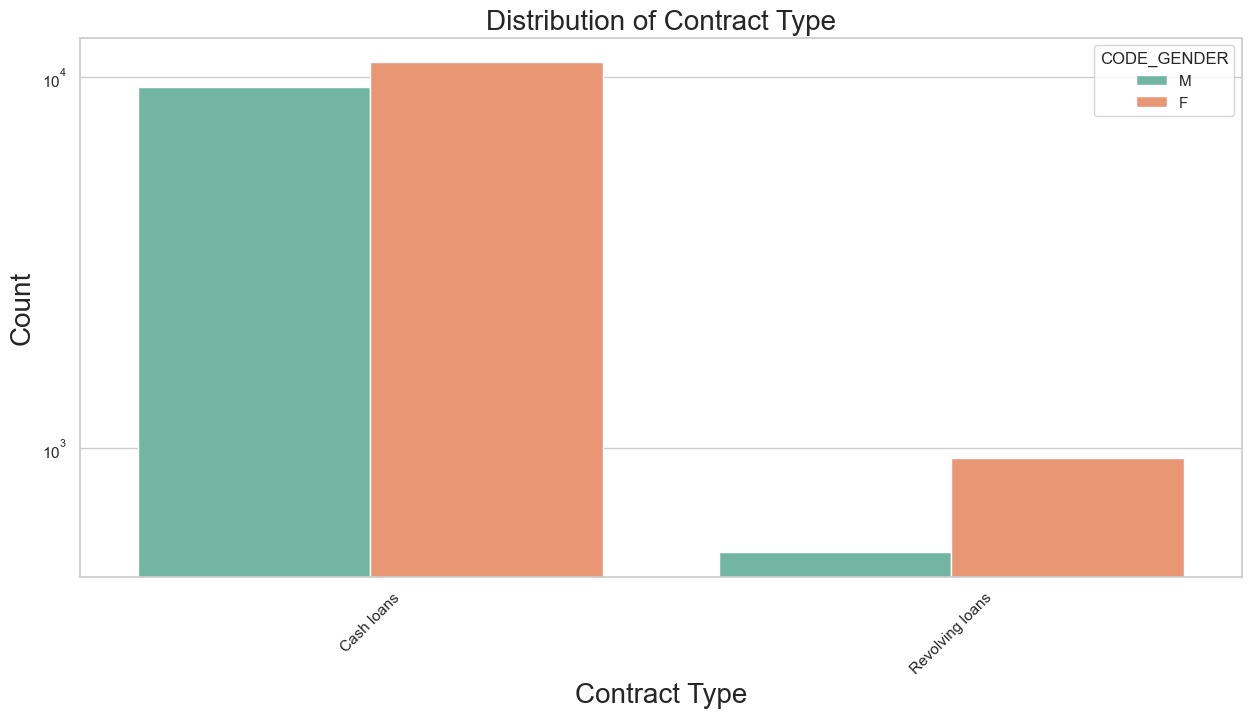

In [138]:
# Plotting or the Contract tyoe across various Gender
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')

sns.countplot(data=target_1, x ='NAME_CONTRACT_TYPE', hue = 'CODE_GENDER',palette = 'Set2')

plt.title('Distribution of Contract Type',fontsize=20)
plt.xlabel('Contract Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

## Conclusion from the Graph

1. For Contract Type 'Cash Loans' is having higher numbers of credits than 'Revolving Loans' contract type

2. For this also Female is leading for applying creits

C:\Users\mihir\AppData\Local\Temp\ipykernel_2936\4094964419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=target_1, y ='ORGANIZATION_TYPE', order = target_1['ORGANIZATION_TYPE'].value_counts().index,palette ='cool')


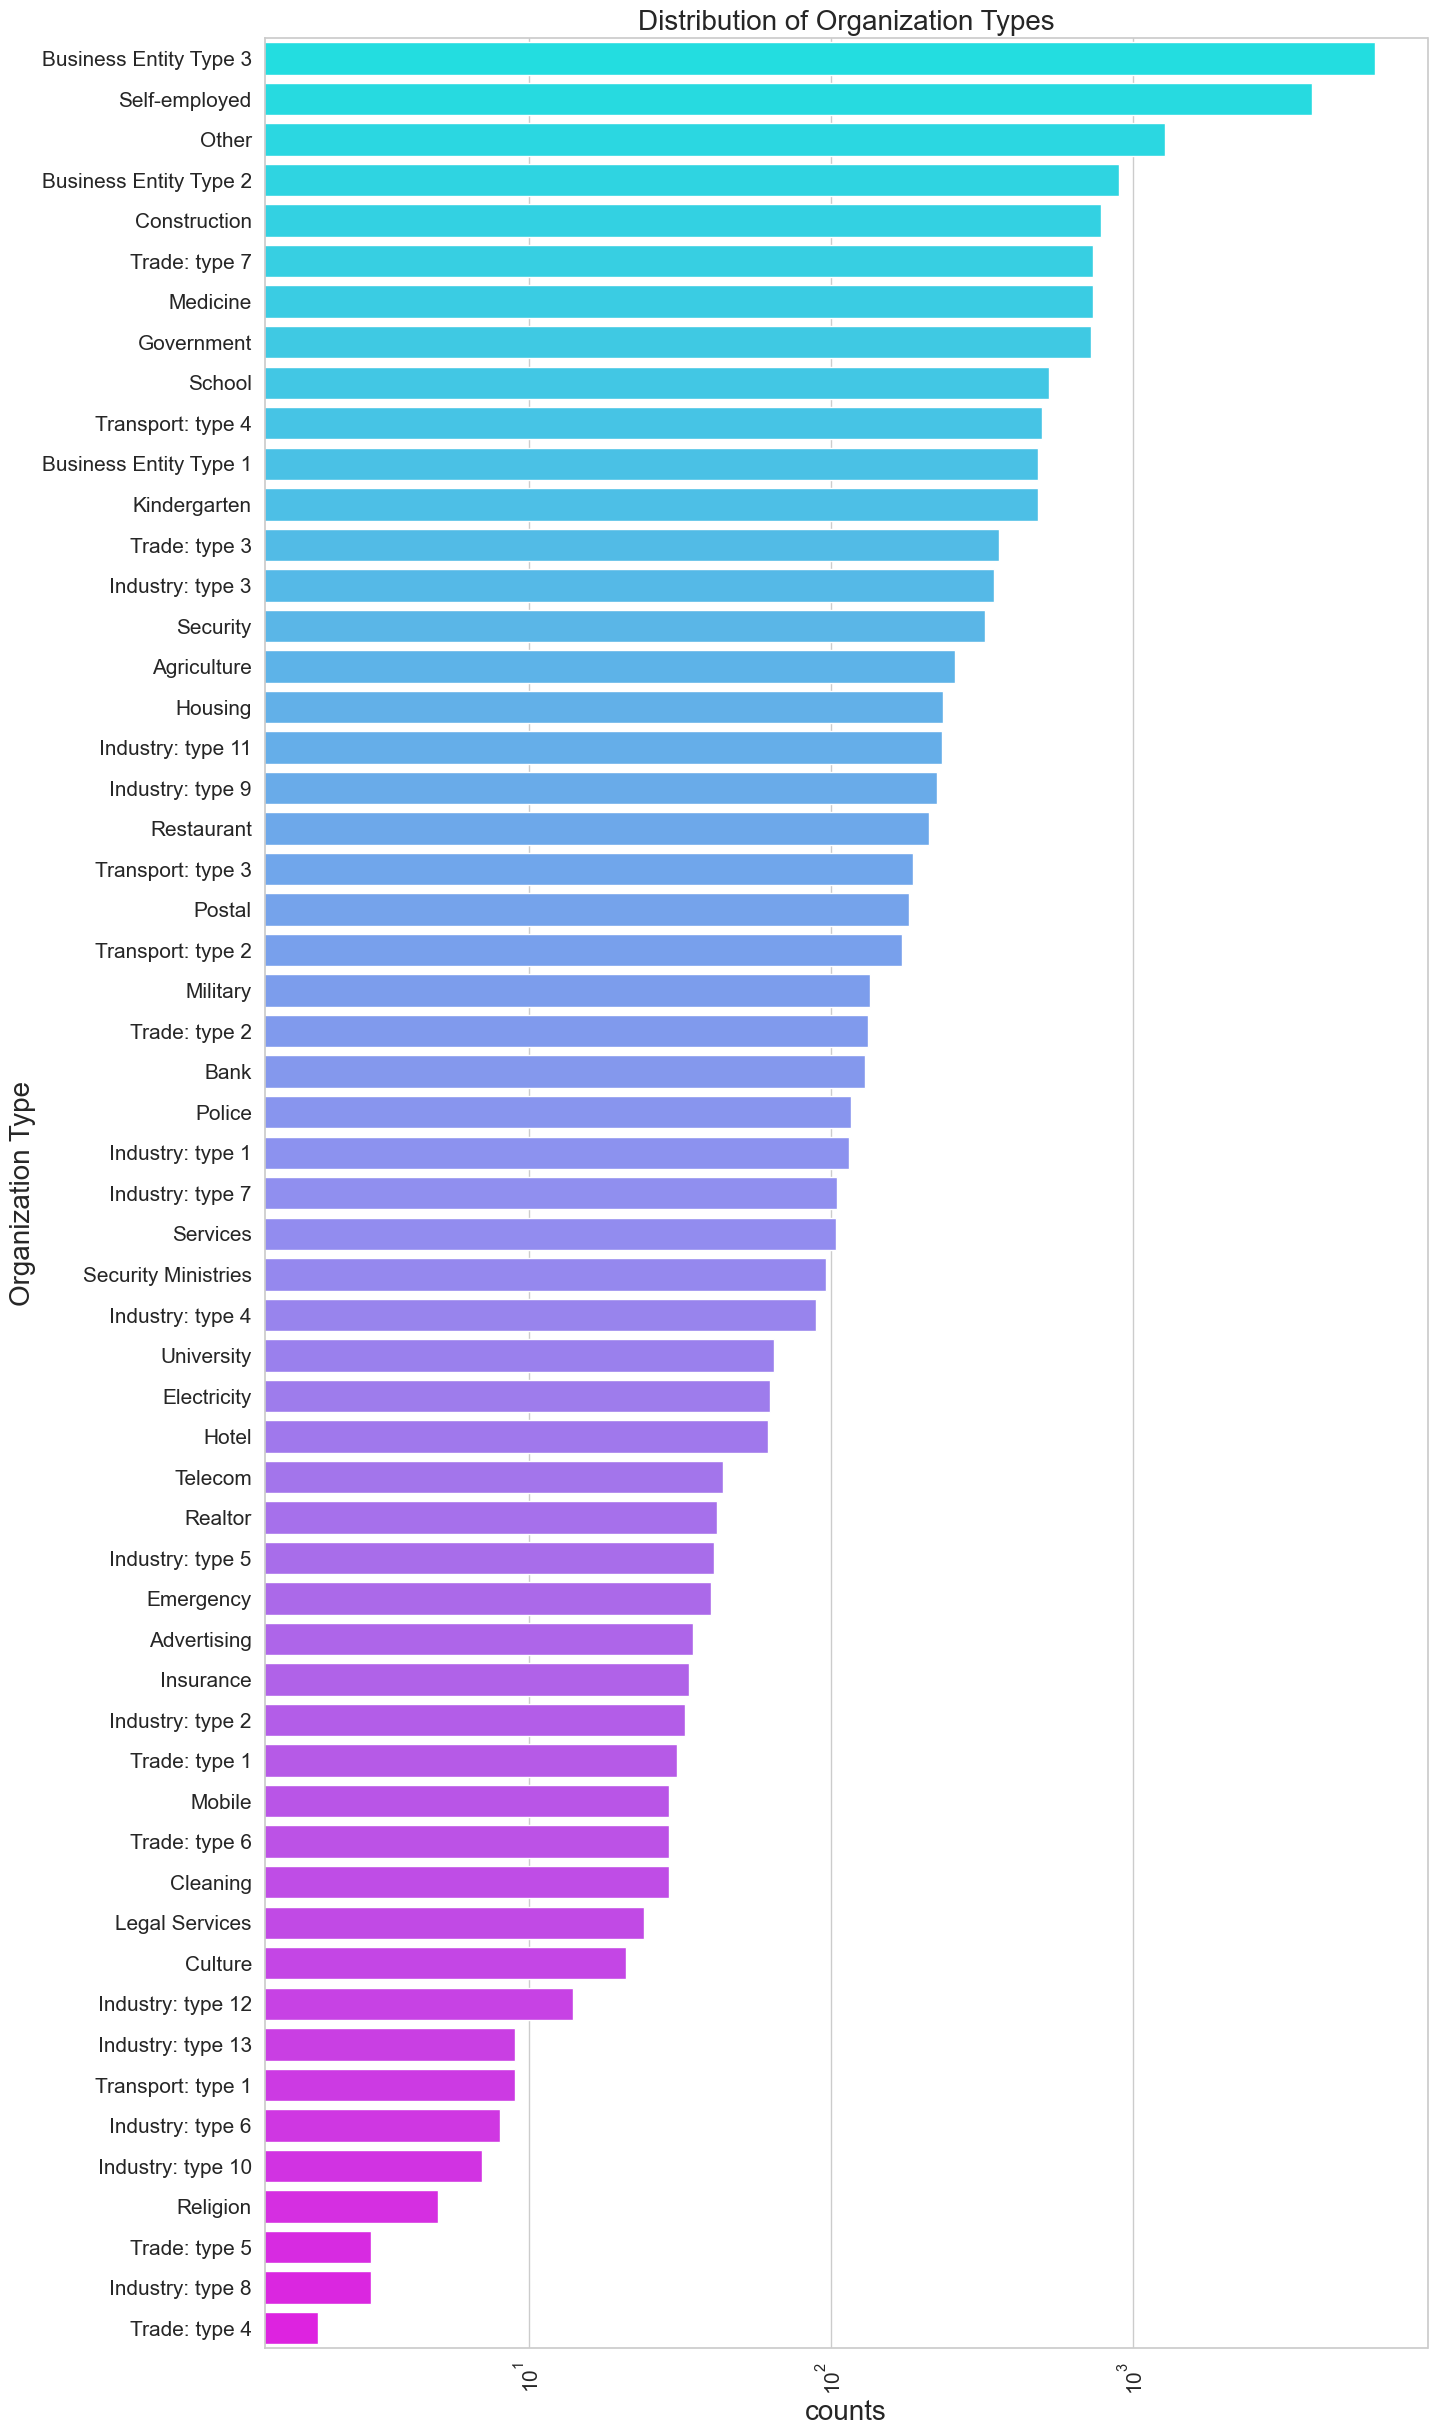

In [139]:
# PLotting for the various Organisation Types

plt.figure(figsize=(15,30))
sns.set_style('whitegrid')

sns.countplot(data=target_1, y ='ORGANIZATION_TYPE', order = target_1['ORGANIZATION_TYPE'].value_counts().index,palette ='cool')

plt.title('Distribution of Organization Types',fontsize=20)
plt.xlabel('counts',fontsize=20)
plt.ylabel('Organization Type',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=90,fontsize=15)

plt.xscale('log')

plt.show()

### Conclusion from the Graph
1. Clients which have applied for the credits are from most of the organisation type 'Business entity Type-3',Self-Employed: 'Other', 'Medicine'
and 'Goverment'
2. Less Clients are from  Industry type 8, type 6, type 10 religion  and trade type 5 and type4

### Defining the Correlation

In [140]:
# Calculating the correlation among the target_0 people
numerical_cols = target_0.select_dtypes(include=['number'])

target_0_corr = numerical_cols.iloc[0:, 2:].corr()

target_0_corr


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.009826,-0.018704,-0.007612,-0.022277,-0.030352,0.242462,0.063036,0.162900,-0.117746,0.893276,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414,-0.026134,0.019388,0.003419,0.019062,0.002384,-0.001019,0.000660,0.000047,-0.017476,-0.000453,-0.020784
AMT_INCOME_TOTAL,-0.009826,1.000000,0.326155,0.400752,0.333217,0.169306,-0.045543,-0.030102,0.034508,-0.026462,-0.003133,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238,0.137752,-0.030661,-0.027914,-0.030477,-0.027415,0.002664,0.009039,0.009068,0.054560,0.016234,0.038459
AMT_CREDIT,-0.018704,0.326155,1.000000,0.762103,0.986315,0.103876,-0.152659,-0.087500,-0.015180,-0.034914,0.036760,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834,0.136033,-0.003803,-0.022223,-0.003770,-0.024255,-0.002694,0.006213,0.000279,0.054174,0.022967,-0.027913
AMT_ANNUITY,-0.007612,0.400752,0.762103,1.000000,0.766464,0.122206,-0.091571,-0.052470,0.009814,-0.025990,0.041231,0.034038,0.039753,0.076045,0.071623,-0.018912,-0.028971,-0.014268,0.126979,-0.016426,-0.023286,-0.016241,-0.024129,0.003876,0.003148,0.013904,0.033052,0.014217,-0.001546
AMT_GOODS_PRICE,-0.022277,0.333217,0.986315,0.766464,1.000000,0.106988,-0.146764,-0.088601,-0.011840,-0.036679,0.034889,0.049964,0.023522,0.052040,0.052319,-0.036935,-0.039240,-0.015803,0.142436,-0.003960,-0.023445,-0.003970,-0.025066,-0.002259,0.006563,0.000791,0.055770,0.023351,-0.030615
REGION_POPULATION_RELATIVE,-0.030352,0.169306,0.103876,0.122206,0.106988,1.000000,-0.041138,0.008663,-0.059696,-0.004014,-0.028813,0.174754,-0.003262,0.065822,0.092300,-0.053687,-0.049449,-0.017033,0.207116,-0.013763,0.005047,-0.013241,0.000658,-0.001447,0.001957,-0.003770,0.074797,-0.002376,-0.003650
DAYS_BIRTH,0.242462,-0.045543,-0.152659,-0.091571,-0.146764,-0.041138,1.000000,0.352662,0.299000,0.108050,0.178013,0.048619,0.058344,0.039298,0.014175,0.165505,0.112517,0.031121,-0.142263,0.019531,0.015212,0.019128,0.015897,-0.000236,0.001093,-0.003593,-0.033796,-0.008802,-0.069111
DAYS_EMPLOYED,0.063036,-0.030102,-0.087500,-0.052470,-0.088601,0.008663,0.352662,1.000000,0.172102,0.086679,0.031523,0.022200,0.056714,0.082435,0.063205,0.112019,0.125791,0.074665,-0.081558,-0.000752,0.007447,-0.000811,0.009392,-0.003171,0.000872,-0.001395,-0.029415,-0.002094,-0.024442
DAYS_REGISTRATION,0.162900,0.034508,-0.015180,0.009814,-0.011840,-0.059696,0.299000,0.172102,1.000000,0.029895,0.155681,-0.031501,0.020549,0.017588,0.009254,0.047235,0.055274,0.031350,-0.071737,0.016317,0.007925,0.016130,0.008158,-0.002818,0.000637,-0.000589,-0.020348,0.002215,-0.018025
DAYS_ID_PUBLISH,-0.117746,-0.026462,-0.034914,-0.025990,-0.036679,-0.004014,0.108050,0.086679,0.029895,1.000000,-0.109789,0.005436,0.026744,0.020968,0.008941,0.053424,0.033071,0.001767,-0.059634,-0.008769,0.008669,-0.009280,0.010258,0.001470,-0.003028,-0.009028,-0.030810,-0.014189,-0.056114


<function matplotlib.pyplot.show(close=None, block=None)>

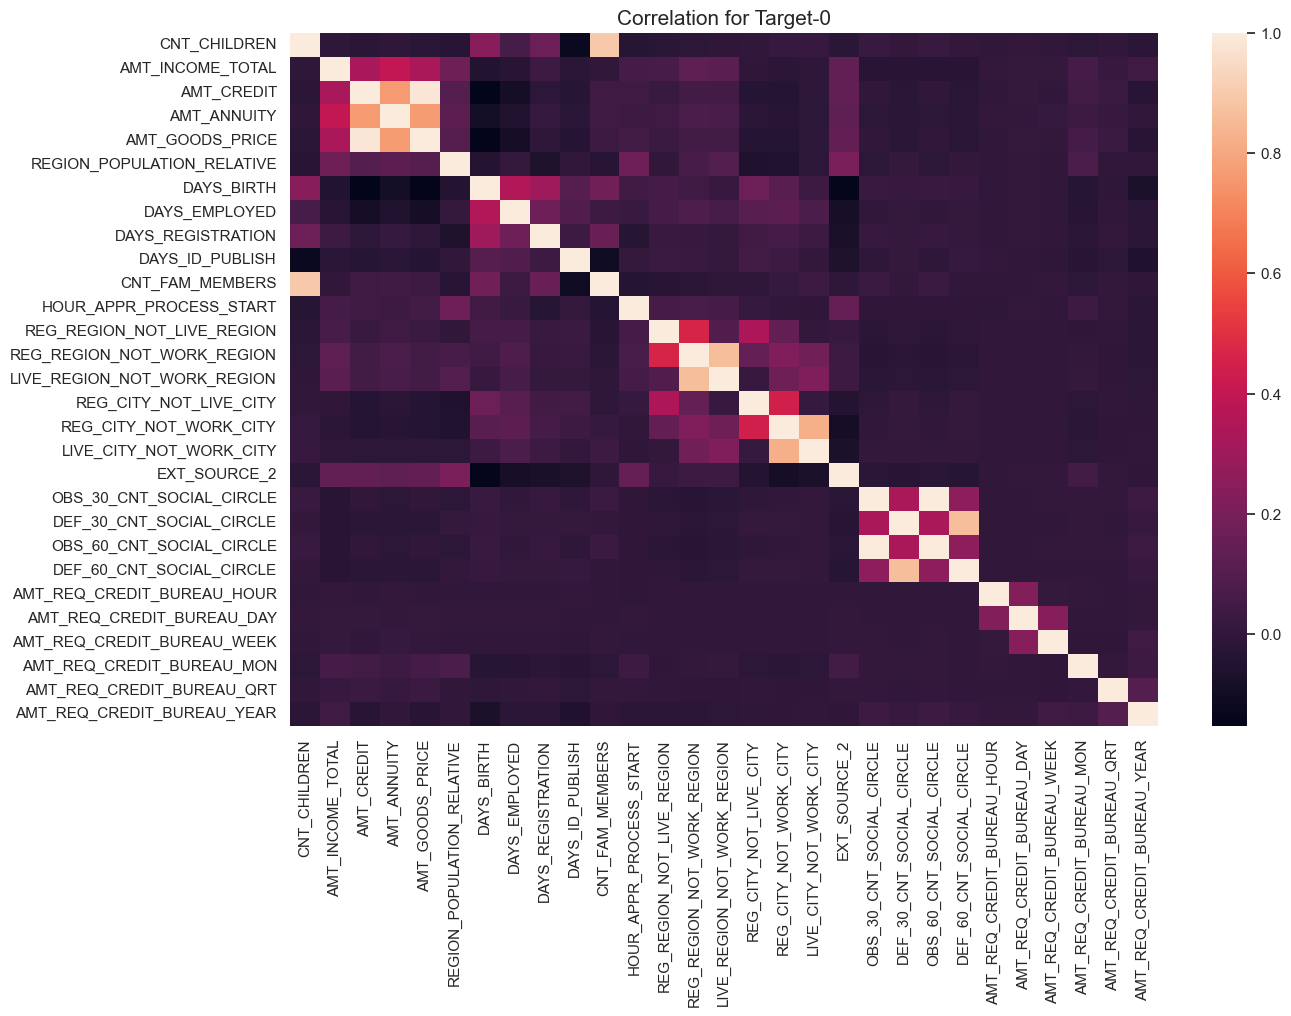

In [141]:
# PLotting the corelation for thr target_0

plt.figure(figsize=(14,9))
sns.heatmap(target_0_corr,annot = False )
plt.title("Correlation for Target-0",fontsize=15)
plt.show

Strong Correlations: Several features, such as AMT_INCOME_TOTAL and AMT_CREDIT, show strong positive correlations with Target-0, indicating that higher values in these variables are associated with the target class.

Moderate Correlations: Other features, including DAYS_BIRTH and DAYS_EMPLOYED, demonstrate moderate correlations, suggesting a potential relationship that could influence Target-0.

Weak/No Correlations: Features like CNT_CHILDREN and REG_CITY_NOT_WORK_CITY exhibit low correlation with Target-0, indicating they may not be significant predictors.

In [142]:
# Calculating the Correalation among the target_1 people
numerical_cols1 = target_1.select_dtypes(include=['number'])

target_1_corr = numerical_cols1.iloc[0:, 2:].corr()

target_1_corr


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.001872,-0.002074,0.015653,-0.007707,-0.032019,0.176563,0.032627,0.126411,-0.089861,0.893829,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332,-0.010600,0.028712,0.002959,0.027955,-0.003220,-0.001269,-0.008695,-0.006195,-0.015163,-0.011841,-0.015698
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,0.036086,0.008476,-0.007822,-0.000039,-0.003959,-0.008858,0.003692,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401,0.006201,-0.005866,-0.005849,-0.005765,-0.005282,0.000925,-0.000071,0.000885,0.005141,0.000607,0.005657
AMT_CREDIT,-0.002074,0.036484,1.000000,0.748708,0.982239,0.069220,-0.189512,-0.106003,-0.033250,-0.062405,0.045420,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875,0.126885,0.015835,-0.031869,0.016319,-0.035170,-0.005051,-0.000943,0.013307,0.061456,-0.003275,-0.008383
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,0.748651,0.074406,-0.090497,-0.049032,0.014302,-0.044289,0.054884,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806,0.120642,-0.000018,-0.024644,0.001216,-0.027918,0.010425,-0.001406,0.034566,0.051267,-0.002792,-0.003192
AMT_GOODS_PRICE,-0.007707,0.036086,0.982239,0.748651,1.000000,0.076210,-0.185486,-0.111906,-0.032067,-0.064666,0.042147,0.042280,0.023532,0.039387,0.038453,-0.035652,-0.041491,-0.017052,0.137716,0.016710,-0.027045,0.017255,-0.029544,-0.004194,0.000755,0.015111,0.064831,-0.002224,-0.011406
REGION_POPULATION_RELATIVE,-0.032019,0.008476,0.069220,0.074406,0.076210,1.000000,-0.049958,-0.015758,-0.055746,-0.011965,-0.030847,0.144049,-0.021946,0.025422,0.050773,-0.060398,-0.053718,-0.019017,0.170162,0.004513,0.023877,0.004907,0.015341,0.000885,-0.001070,0.007411,0.067029,-0.002863,0.004887
DAYS_BIRTH,0.176563,-0.007822,-0.189512,-0.090497,-0.185486,-0.049958,1.000000,0.307018,0.241202,0.135519,0.110353,0.034990,0.044508,0.022145,0.000483,0.142376,0.096474,0.012044,-0.142909,-0.009064,0.011109,-0.009647,0.012546,0.010105,0.000314,-0.001082,-0.032843,-0.019140,-0.093098
DAYS_EMPLOYED,0.032627,-0.000039,-0.106003,-0.049032,-0.111906,-0.015758,0.307018,1.000000,0.137454,0.096559,-0.001630,0.000092,0.059212,0.075389,0.054503,0.113374,0.134581,0.071026,-0.094249,-0.030834,0.000503,-0.030778,0.000288,0.007059,-0.007546,-0.012194,-0.028851,0.007965,-0.044658
DAYS_REGISTRATION,0.126411,-0.003959,-0.033250,0.014302,-0.032067,-0.055746,0.241202,0.137454,1.000000,0.049891,0.123583,-0.048209,0.010866,0.004578,0.000767,0.028759,0.049148,0.028976,-0.077788,0.014861,0.014170,0.015193,0.012064,-0.003311,0.000184,0.006521,-0.001332,-0.009887,-0.018053
DAYS_ID_PUBLISH,-0.089861,-0.008858,-0.062405,-0.044289,-0.064666,-0.011965,0.135519,0.096559,0.049891,1.000000,-0.088621,0.008774,0.025320,0.013408,0.002667,0.047784,0.016251,-0.014871,-0.065811,-0.020269,0.012605,-0.020052,0.009585,0.000149,-0.015244,-0.003879,-0.032077,-0.004953,-0.073064


<function matplotlib.pyplot.show(close=None, block=None)>

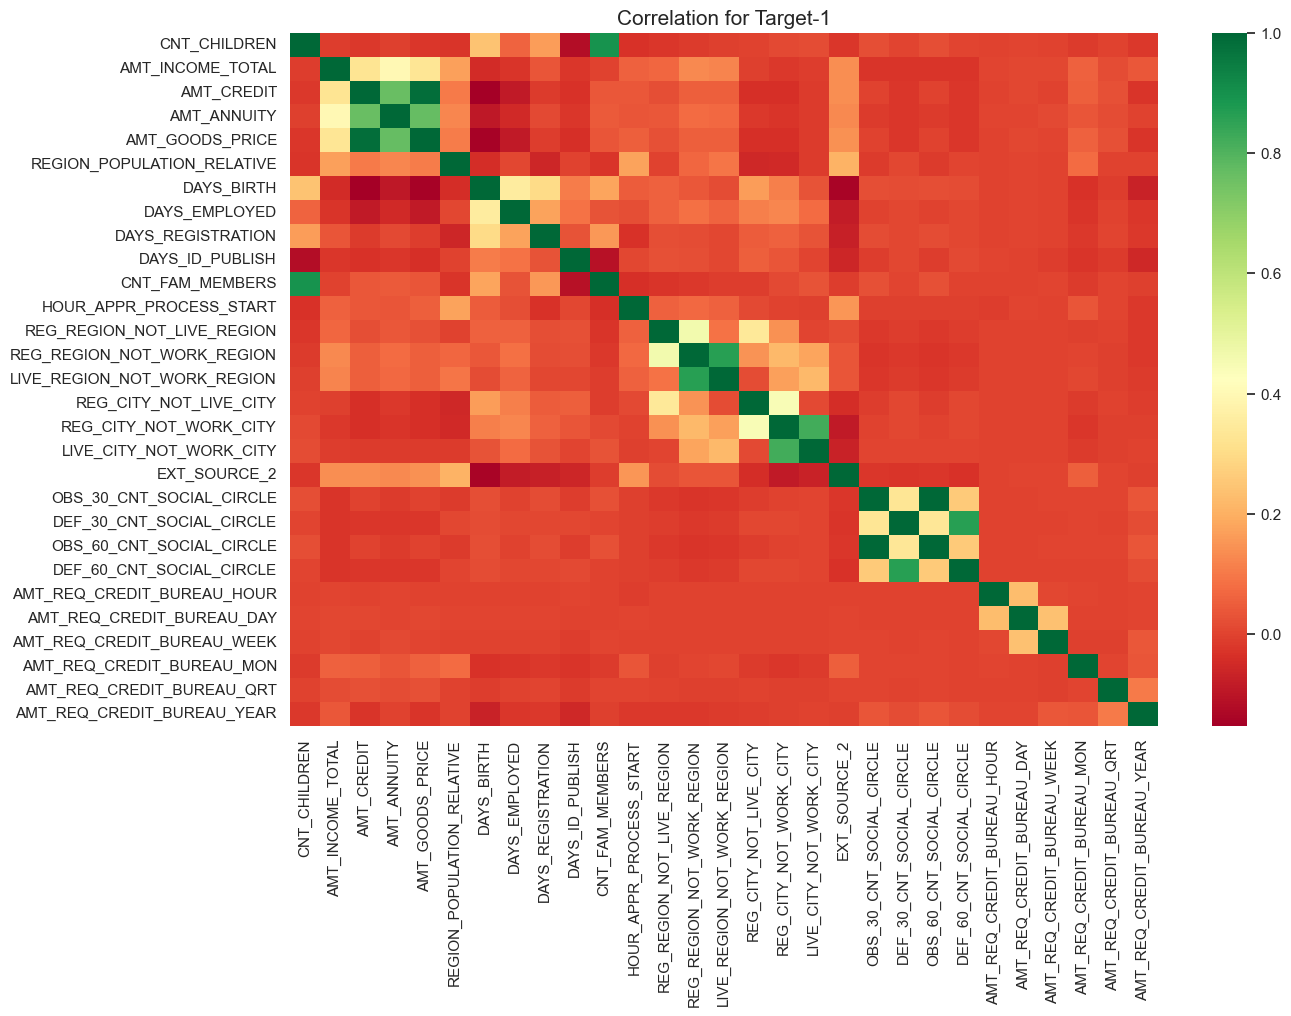

In [143]:
# PLotting the corelation for thr target_1

plt.figure(figsize=(14,9))
sns.heatmap(target_0_corr,annot = False, cmap='RdYlGn' )
plt.title("Correlation for Target-1",fontsize=15)
plt.show

## Bivariate Analysis

Text(0, 0.5, 'Income')

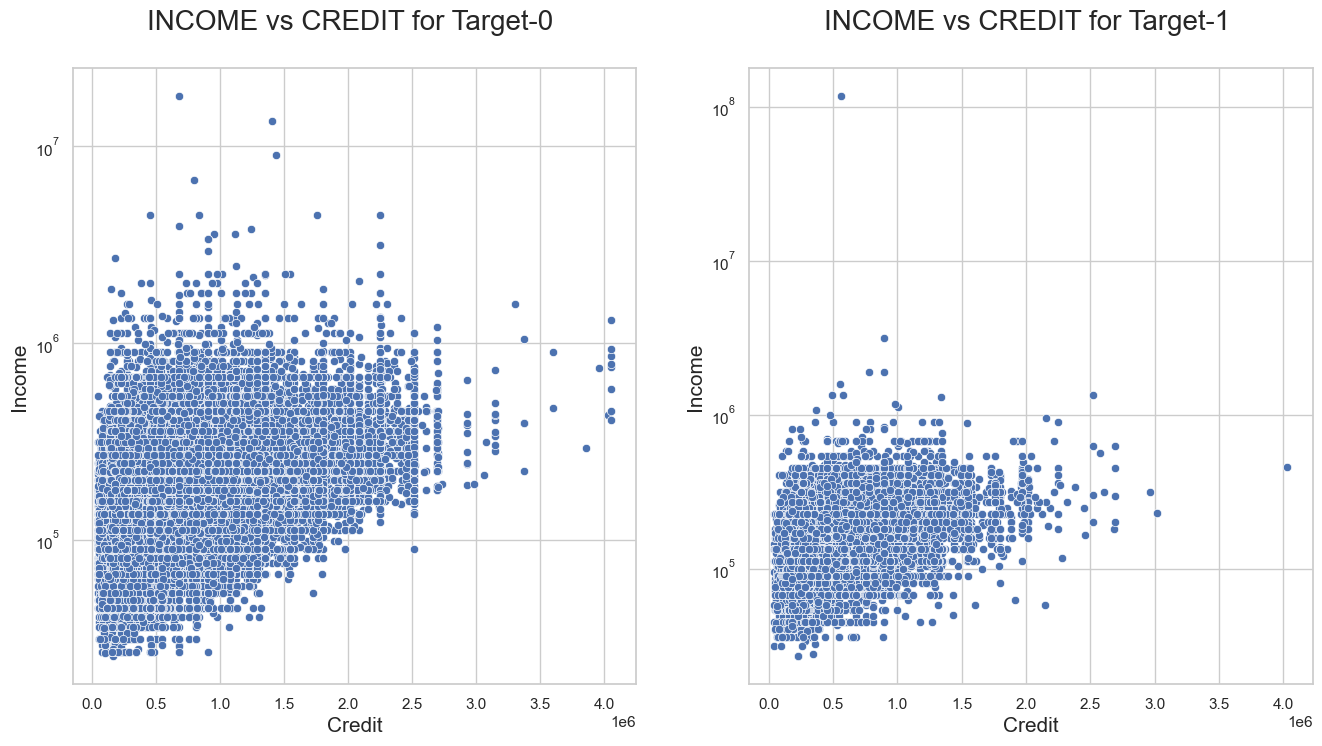

In [144]:
#Plotting scatterplot to find any correlations and to check the trends in the dataset, in logs,

plt.figure(figsize=[16, 8])

# First subplot: Target 0
plt.subplot(1, 2, 1)
sns.scatterplot(x=target_0.AMT_CREDIT, y=target_0.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-0 \n', fontsize=20)
plt.yscale('log')
plt.xlabel("Credit", fontsize=15)
plt.ylabel("Income", fontsize=15)

# Second subplot: Target 1
plt.subplot(1, 2, 2)
sns.scatterplot(x=target_1.AMT_CREDIT, y=target_1.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-1 \n', fontsize=20)
plt.yscale('log')
plt.xlabel("Credit", fontsize=15)
plt.ylabel("Income", fontsize=15)


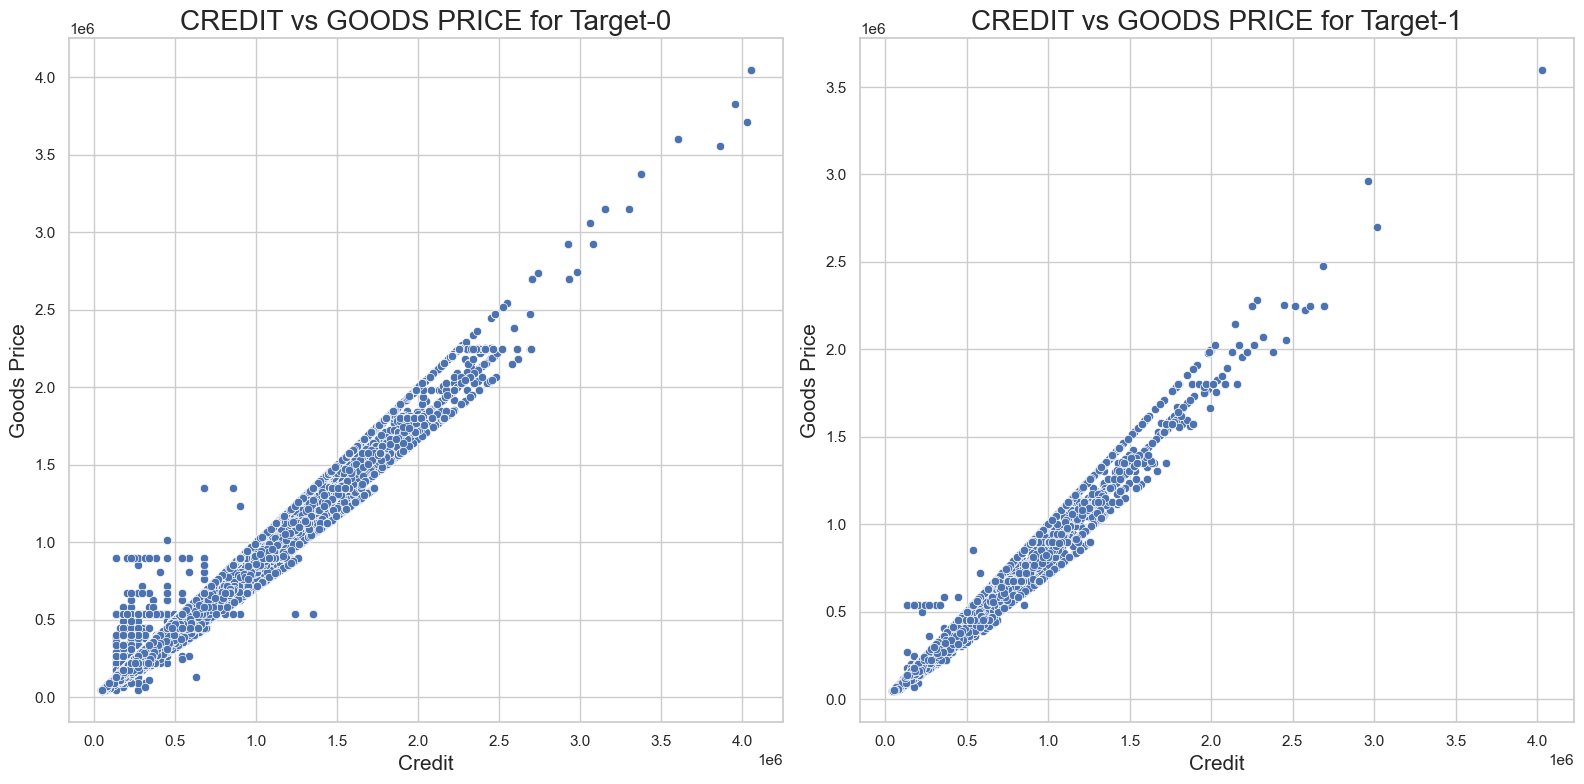

In [145]:
#Plottig Scatterplot to find any correlations an to check the trends in the dataset

plt.figure(figsize=[16, 8])

# First subplot: Target 0
plt.subplot(1, 2, 1)
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=target_0)
plt.title('CREDIT vs GOODS PRICE for Target-0', fontsize=20)
plt.xlabel("Credit", fontsize=15)
plt.ylabel("Goods Price", fontsize=15)

# Second subplot: Target 1
plt.subplot(1, 2, 2)
sns.scatterplot(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=target_1)
plt.title('CREDIT vs GOODS PRICE for Target-1', fontsize=20)
plt.xlabel("Credit", fontsize=15)
plt.ylabel("Goods Price", fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()


Summary of the Scatter Plots
The scatter plots display the relationship between "CREDIT" and "GOODS PRICE" for two different targets:

Target-0 (Left Plot):

General Trend: There is a clear positive correlation between credit and goods price, with most points lining up along an increasing diagonal.
Data Distribution: Many data points cluster at lower values of both credit and goods price, suggesting a sizable number of transactions occur within this range.
Target-1 (Right Plot):

Different Pattern: While there is still a positive correlation, the data points are more evenly distributed across a broader range of values compared to Target-0.
Higher Values: The highest values of goods price show a more significant spread of credit, indicating varied purchasing power or credit levels among higher-priced goods.

## Find the outliers

# For Target = 0


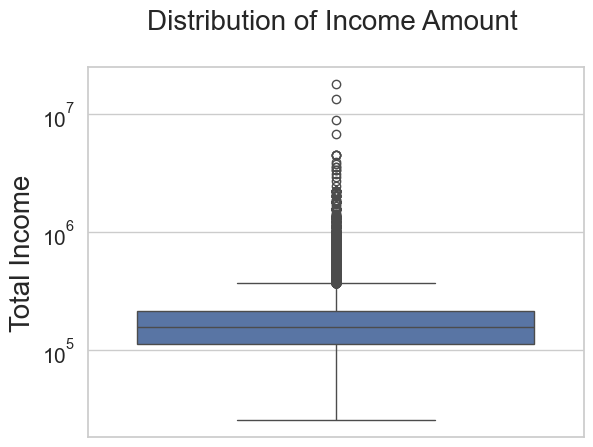

In [146]:

# Distribution of Income Amount

sns.set_style('whitegrid')
sns.boxplot(data=target_0, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Income", fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)
plt.show()


## Conclusion from the graph

1.There seems to be an equal distribution of the income amount of the clients

2.Also some of the outliers present in the dataset

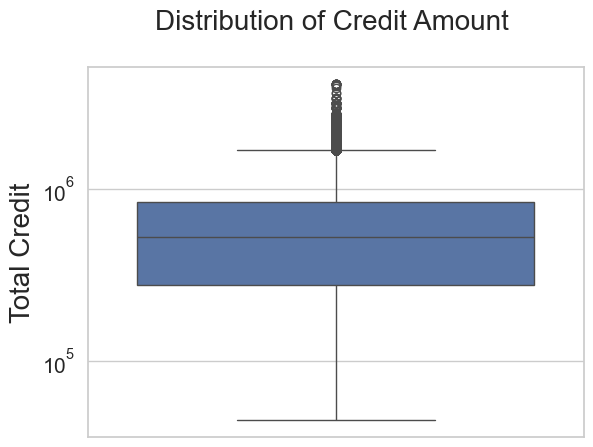

In [147]:
# Distribution of the Credit Amount
sns.set_style('whitegrid')
sns.boxplot(data=target_0, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Credit", fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)
plt.show()

### Conclusion From the graph
1. the first quartile is bigger than the third quartile that means most of the clients credit lies in the first-Quartile
2. there seems some outliers in the credit boxplot

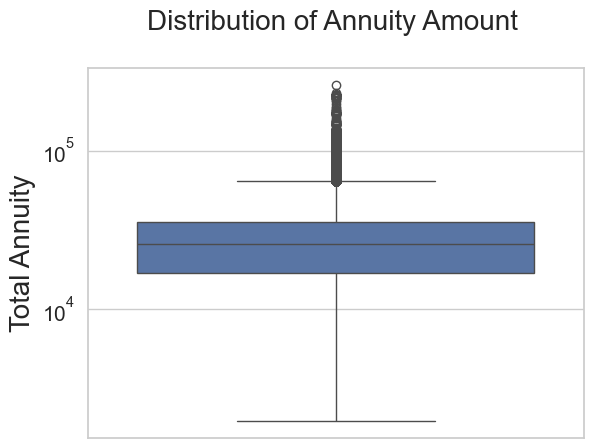

In [148]:
# Distribution of  Annuity
sns.set_style('whitegrid')
sns.boxplot(data=target_0, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Annuity", fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)
plt.show()

### Conclusion from the graph
1. The first Quartile is bigger than the third Quartile
2. There seems some outliers present in the Annuity boxplot

# For Target = 1

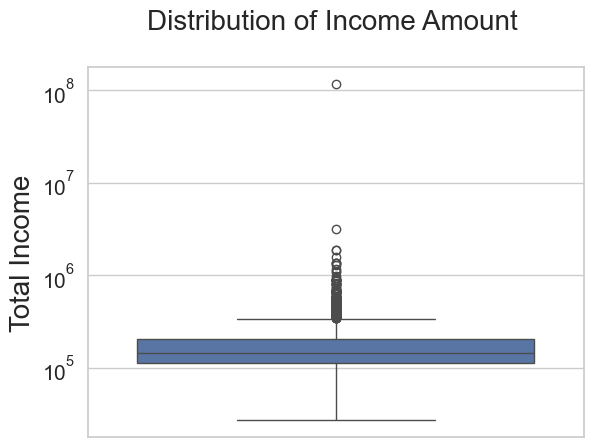

In [149]:
# For Target = 1 
# Distribution of Income Amount

sns.set_style('whitegrid')
sns.boxplot(data=target_1, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Income", fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)
plt.show()

 ### Conclusion from the graph
1. There seems to be significant Outliers in the Income boxplot
2. Most of the income lies in the third quartile

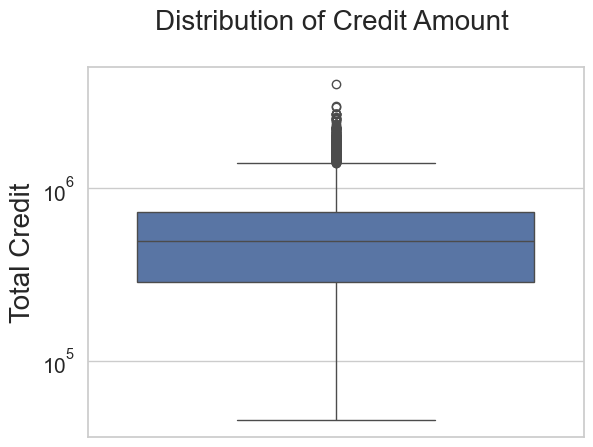

In [150]:
# Distribution of the Credit Amount
sns.set_style('whitegrid')
sns.boxplot(data=target_1, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Credit", fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)
plt.show()

### Conclusion from the Graph
1. The first quartile is bigger than the third quartile. that means most of the client credit lies in the frst quartile
2. There seems to be outliers present in the Credit BoxPlot

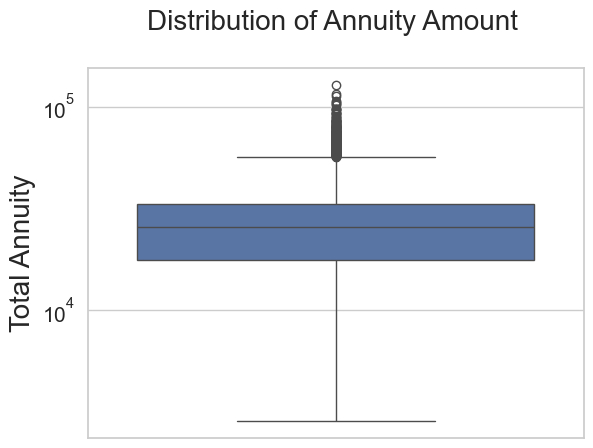

In [151]:
# Distribution of  Annuity
sns.set_style('whitegrid')
sns.boxplot(data=target_1, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks (fontsize=15)
plt.ylabel("Total Annuity", fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)
plt.show()

### Conclusion from the graph
1. The First quartile is bigger than the third quartile
2. there seems some outliers in the Annuity boxplot

## Multivariate Analysis

### Target = 0

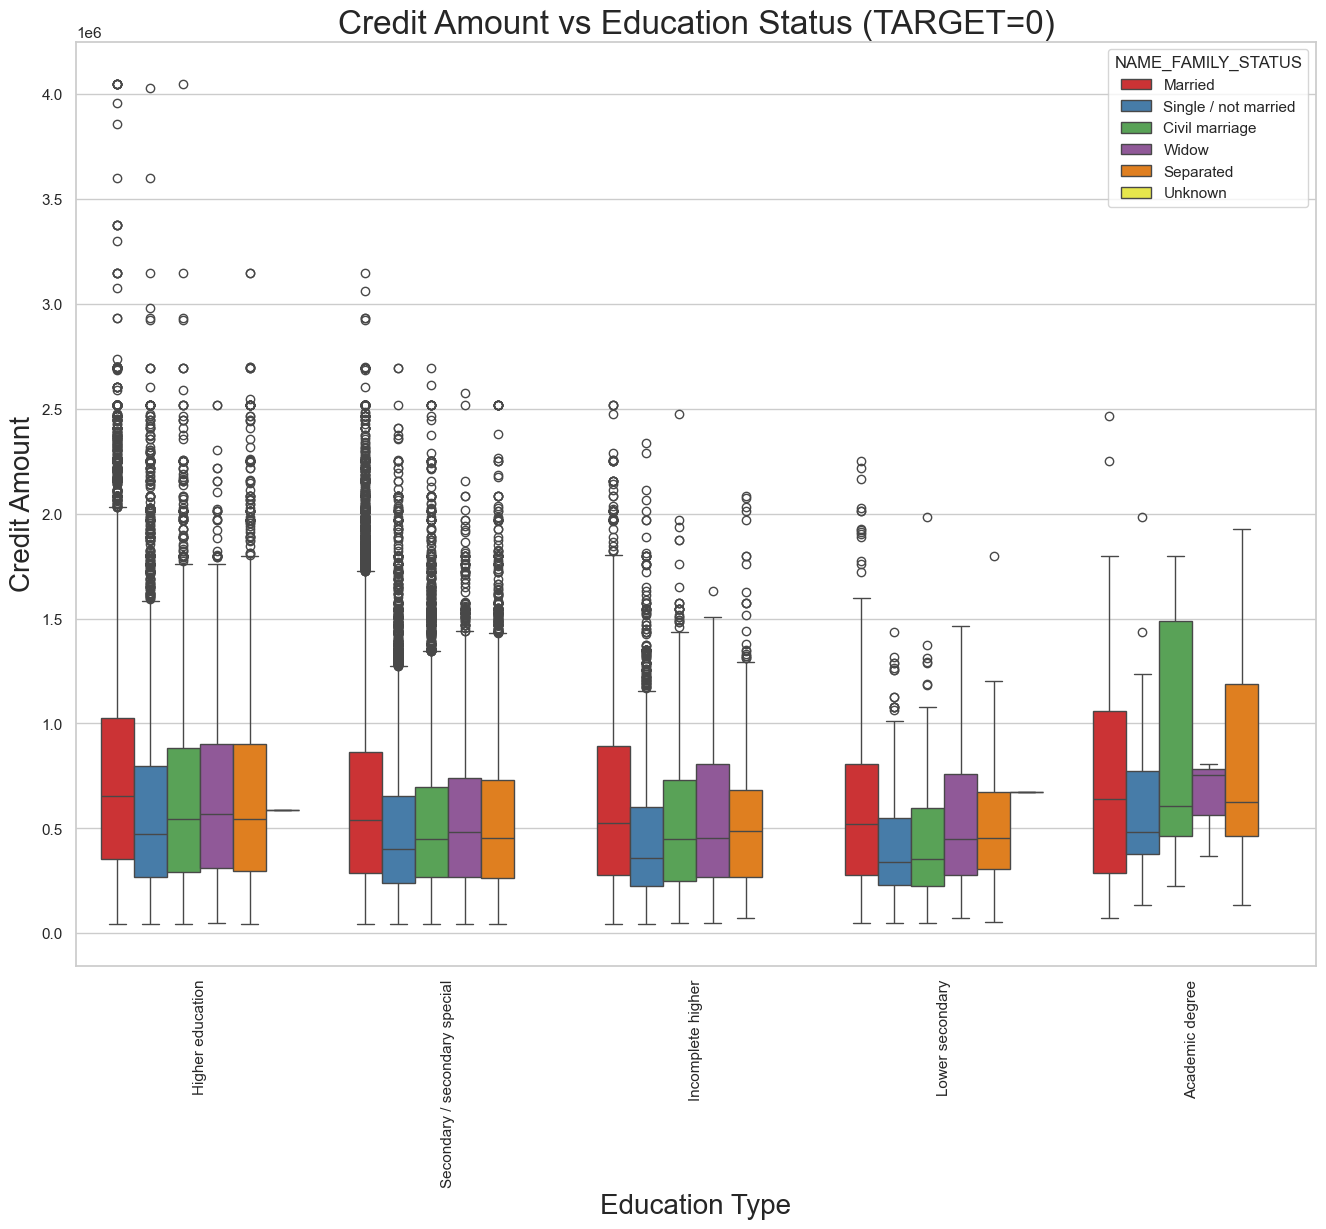

In [152]:
# Box Plotting for the Target = 0 , Credit Amount

plt.figure(figsize=[16, 12])

# Boxplot
sns.boxplot(data=target_0, 
            x='NAME_EDUCATION_TYPE', 
            y='AMT_CREDIT', 
            hue='NAME_FAMILY_STATUS', 
            palette='Set1')

# Adjusting aesthetics
plt.xticks(rotation=90)
plt.xlabel('Education Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit Amount vs Education Status (TARGET=0)', fontsize=24)

# Display the plot
plt.show()


### Conclusion from the Graph
Form the above box plot we can conclude that Family Status of 'civil marriage', 'marriage' and 'seperated' of Academic degree education are
having higher number of credits than others . Also, higher education of family status of 'marriage'. 'single','civil marriage' are having more outliers 
.Civil Marriage for Academic degree id having most of the credits in the third quartile

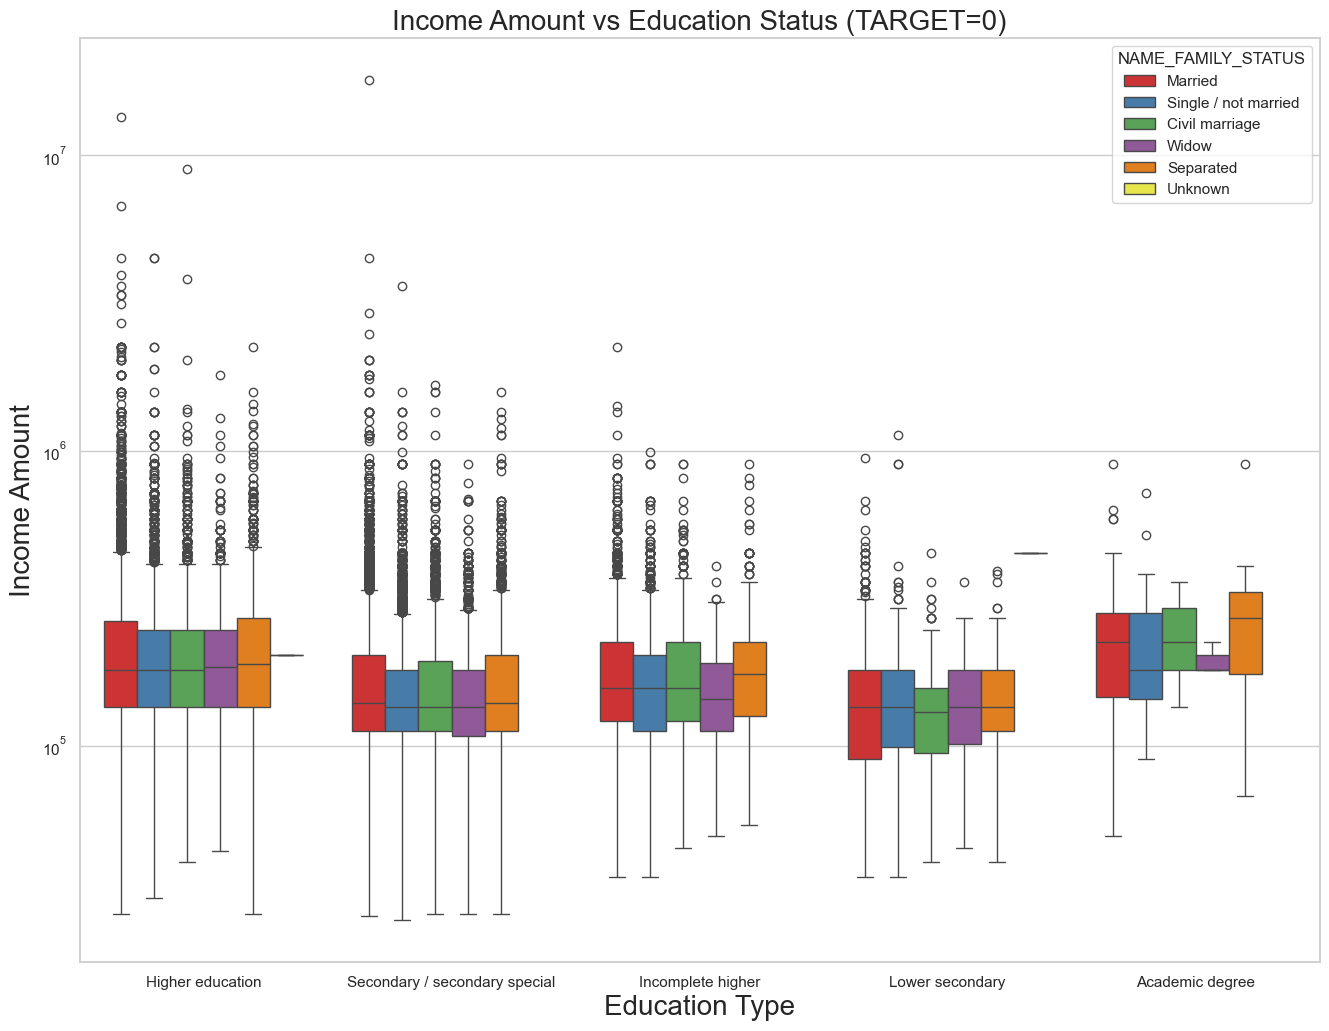

In [153]:
# Box Plotting for the Target = 0, Income Amount
plt.figure(figsize=[16,12])

# Boxplot
sns.boxplot(data=target_0, 
            x='NAME_EDUCATION_TYPE', 
            y='AMT_INCOME_TOTAL', 
            hue='NAME_FAMILY_STATUS', 
            palette='Set1')

# Adjusting aesthetics
plt.xticks(rotation=0)
plt.xlabel('Education Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income Amount vs Education Status (TARGET=0)', fontsize=20)

# Display the plot
plt.show()

### Conclusion From the Graph
From above boxplot for Education type Higher education' the income amount is mostly equal with family status. It does contain many outliers Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

# Cleaning the Previous_application Dataset

In [154]:
# Previewing the previous_Dataset 
df_prev.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
5,1383531,199383,Cash loans,315000.0,340573.5,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
19,1173070,199178,Cash loans,45000.0,49455.0,SATURDAY,16,Y,1,Everyday expenses,Refused,-584,XNA,HC,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,high,Cash Street: high
51,2664403,163660,Cash loans,67500.0,82611.0,SATURDAY,10,Y,1,Car repairs,Approved,-766,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
85,1981960,306707,Cash loans,225000.0,269550.0,WEDNESDAY,11,Y,1,Building a house or an annex,Refused,-13,Cash through the bank,SCOFR,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
172,1382147,336630,Cash loans,112500.0,127350.0,MONDAY,13,Y,1,Other,Approved,-631,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),4,XNA,high,Cash Street: high
222,1876485,354388,Cash loans,976500.0,1061572.5,FRIDAY,12,Y,1,Repairs,Refused,-210,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
273,1168330,133439,Cash loans,180000.0,203760.0,WEDNESDAY,11,Y,1,Other,Refused,-553,XNA,LIMIT,Repeater,XNA,Cash,walk-in,Country-wide,30,Connectivity,high,Cash Street: high
312,2793811,139978,Cash loans,229500.0,302206.5,THURSDAY,8,Y,1,Repairs,Refused,-33,Cash through the bank,SCOFR,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action,Cash Street: low
313,2036767,159610,Cash loans,135000.0,182956.5,SATURDAY,10,Y,1,Repairs,Refused,-492,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [155]:
df_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_APPLICATION',
       'AMT_CREDIT', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [156]:
# Analyzing the shape 
df_prev.shape

(69635, 23)

In [157]:
df_prev.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [158]:
df_prev.PRODUCT_COMBINATION.isnull().sum()

0

In [159]:
df_prev['AMT_CREDIT'].fillna(df_prev['AMT_CREDIT'].mean(), inplace=True)

C:\Users\mihir\AppData\Local\Temp\ipykernel_2936\4177051411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prev['AMT_CREDIT'].fillna(df_prev['AMT_CREDIT'].mean(), inplace=True)


In [160]:
df_prev['PRODUCT_COMBINATION'].fillna(df_prev.PRODUCT_COMBINATION.mode()[0], inplace = True)

C:\Users\mihir\AppData\Local\Temp\ipykernel_2936\1081043063.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prev['PRODUCT_COMBINATION'].fillna(df_prev.PRODUCT_COMBINATION.mode()[0], inplace = True)


In [161]:
df_prev.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [162]:
# Checking the Null values in the Dataset
round((100*df_prev.isnull().sum()/len(df_prev)),2)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [163]:
# Checking the NA.ME_CASH_LOAN_PURPOSE for any unique values
df_prev.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: count

In [164]:
# We Got two Unknown Columns in our Dataset 'XAP' and 'XNA' We have to drop 
df_prev = df_prev.drop(df_prev[df_prev.NAME_CASH_LOAN_PURPOSE == 'XAP'].index)
df_prev = df_prev.drop(df_prev[df_prev.NAME_CASH_LOAN_PURPOSE == 'XNA'].index)

In [165]:
# ReChecking the NAME_CASH_LOAN_PURPOSE for any unique values
df_prev.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: count

# Merging Two Dataset that is application_dataset and Previous_dataset

In [166]:
# Merging the Two Datasets

loan_data = pd.merge(left=df_app, right=df_prev, how='inner', on='SK_ID_CURR', suffixes=('_','x'))




In [167]:
# Previewing the new Datset
loan_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_TOTAL_BINNED,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799,-3015,1.0,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,0,0,0,0,0,0,150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266,-3787,2.0,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0,0,0,1,0,5,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557,-3557,3.0,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,0,0,0,0,1,1,700000-750000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0,0,0,1,0,1,500000-550000,1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0,0,0,1,0,1,500000-550000,1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal,Cash Street: low
5,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,-12282,-778,-1824,-1992,2.0,TUESDAY,10,0,0,0,0,0,0,Emergency,0.705947,4.0,0.0,4.0,0.0,0,0,0,1,0,0,450000-500000,1191663,Cash loans,180000.0,180000.0,FRIDAY,13,Y,1,Repairs,Approved,-466,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credi

In [168]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51420 entries, 0 to 51419
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   51420 non-null  int64   
 1   TARGET                       51420 non-null  int64   
 2   NAME_CONTRACT_TYPE_          51420 non-null  object  
 3   CODE_GENDER                  51420 non-null  object  
 4   FLAG_OWN_CAR                 51420 non-null  object  
 5   FLAG_OWN_REALTY              51420 non-null  object  
 6   CNT_CHILDREN                 51420 non-null  int64   
 7   AMT_INCOME_TOTAL             51420 non-null  float64 
 8   AMT_CREDIT_                  51420 non-null  float64 
 9   AMT_ANNUITY                  51420 non-null  float64 
 10  AMT_GOODS_PRICE              51420 non-null  float64 
 11  NAME_TYPE_SUITE              51420 non-null  object  
 12  NAME_INCOME_TYPE             51420 non-null  object  
 13  N

In [169]:
# Renaming the Columns in the new Dataset Loan_data

loan_data   = loan_data.rename({'NAME_CONTRACT_TYPE_': 'NAME_CONTRACT_TYPE', 'AMT_CREDIT_':'AMT_CREDIT', 'AMT_ANNUITY_': 'AMT_ANNUITY', 
                                'WEEKDAY_APPR_PROCESS_START_': 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START_': 'HOUR_APPR_PROCESS_START',
                                'NAME_CONTRACT_TYPEx': 'NAME_CONTRACT_TYPE_PREV', 'AMT_CREDITx': 'AMT_CREDIT_PREV', 'AMT_ANNUITYx': 'AMT_ANNUITY_PREV',
                                'WEEKDAY_APPR_PROCESS_STARTx': 'WEEKDAY_APPR_PROCESS_START_PREV', 'HOUR_APPR_PROCESS_STARTx': 'HOUR_APPR_PROCESS_START_PREV'},
                                axis=1)

In [170]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51420 entries, 0 to 51419
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   SK_ID_CURR                       51420 non-null  int64   
 1   TARGET                           51420 non-null  int64   
 2   NAME_CONTRACT_TYPE               51420 non-null  object  
 3   CODE_GENDER                      51420 non-null  object  
 4   FLAG_OWN_CAR                     51420 non-null  object  
 5   FLAG_OWN_REALTY                  51420 non-null  object  
 6   CNT_CHILDREN                     51420 non-null  int64   
 7   AMT_INCOME_TOTAL                 51420 non-null  float64 
 8   AMT_CREDIT                       51420 non-null  float64 
 9   AMT_ANNUITY                      51420 non-null  float64 
 10  AMT_GOODS_PRICE                  51420 non-null  float64 
 11  NAME_TYPE_SUITE                  51420 non-null  object  
 12  NAME

In [171]:
# Droping the Unwanted columns 
loan_data.drop(['SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
           'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'WEEKDAY_APPR_PROCESS_START_PREV',
           'HOUR_APPR_PROCESS_START_PREV','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)

In [172]:
loan_data.isnull().sum()

TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                      0
AMT_GOODS_PRICE                  0
NAME_TYPE_SUITE                  0
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
CNT_FAM_MEMBERS                  0
ORGANIZATION_TYPE                0
EXT_SOURCE_2                    45
OBS_30_CNT_SOCIAL_CIRCLE        68
DEF_30_CNT_SOCIAL_CIRCLE        68
OBS_60_CNT_SOCIAL_CIRCLE        68
DEF_60_CNT_SOCIAL_CIRCLE        68
AMT_REQ_CREDIT_BUREAU_HOUR       0
AMT_REQ_CREDIT_BUREA

# UniVariate Analysis

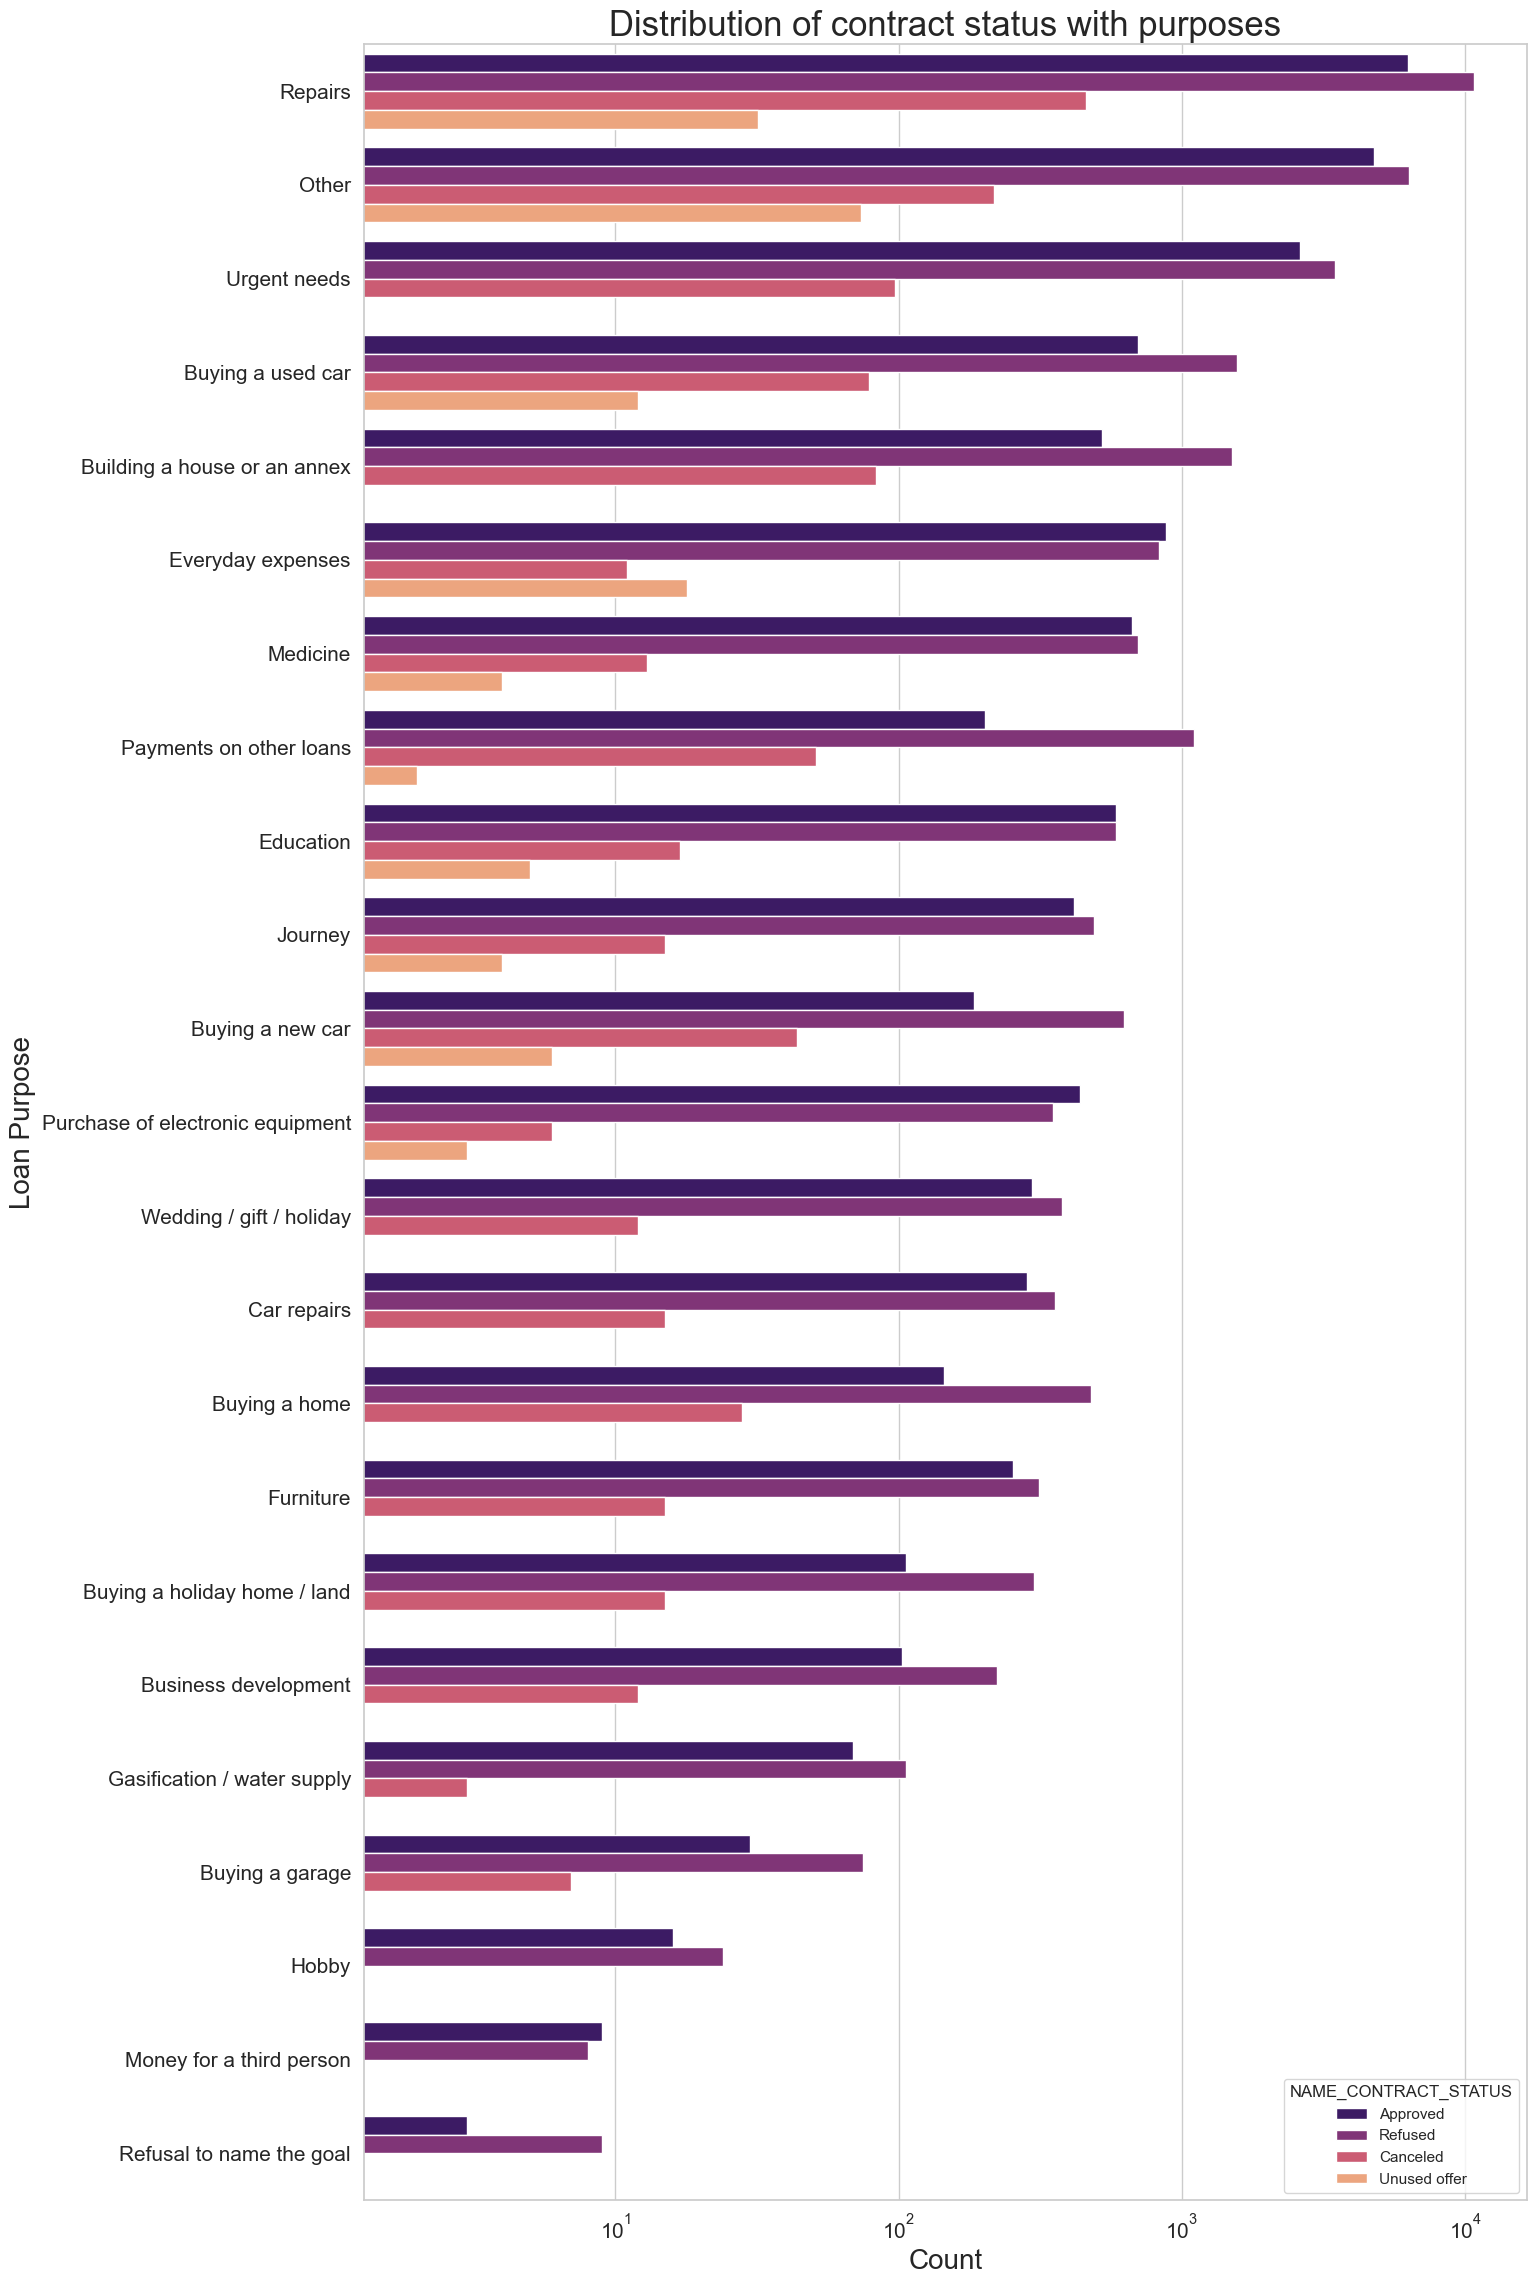

In [173]:
plt.figure(figsize=[15,28])

sns.countplot(data = loan_data, y  = 'NAME_CASH_LOAN_PURPOSE',order=loan_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of contract status with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

The bar chart illustrates the distribution of loan purposes along with their corresponding contract statuses, categorized as approved, denied, canceled, or unused offers:

Most Common Purposes:

Repairs: The highest frequency of approved contracts is for repairs, indicating strong demand for home or auto improvements.
Everyday Expenses and Buying a Used Car follow closely, reflecting common financial needs among borrowers.
Relevant Insights:

Education and Buying a New Car have a significant number of approved statuses, suggesting these are popular reasons for securing loans.

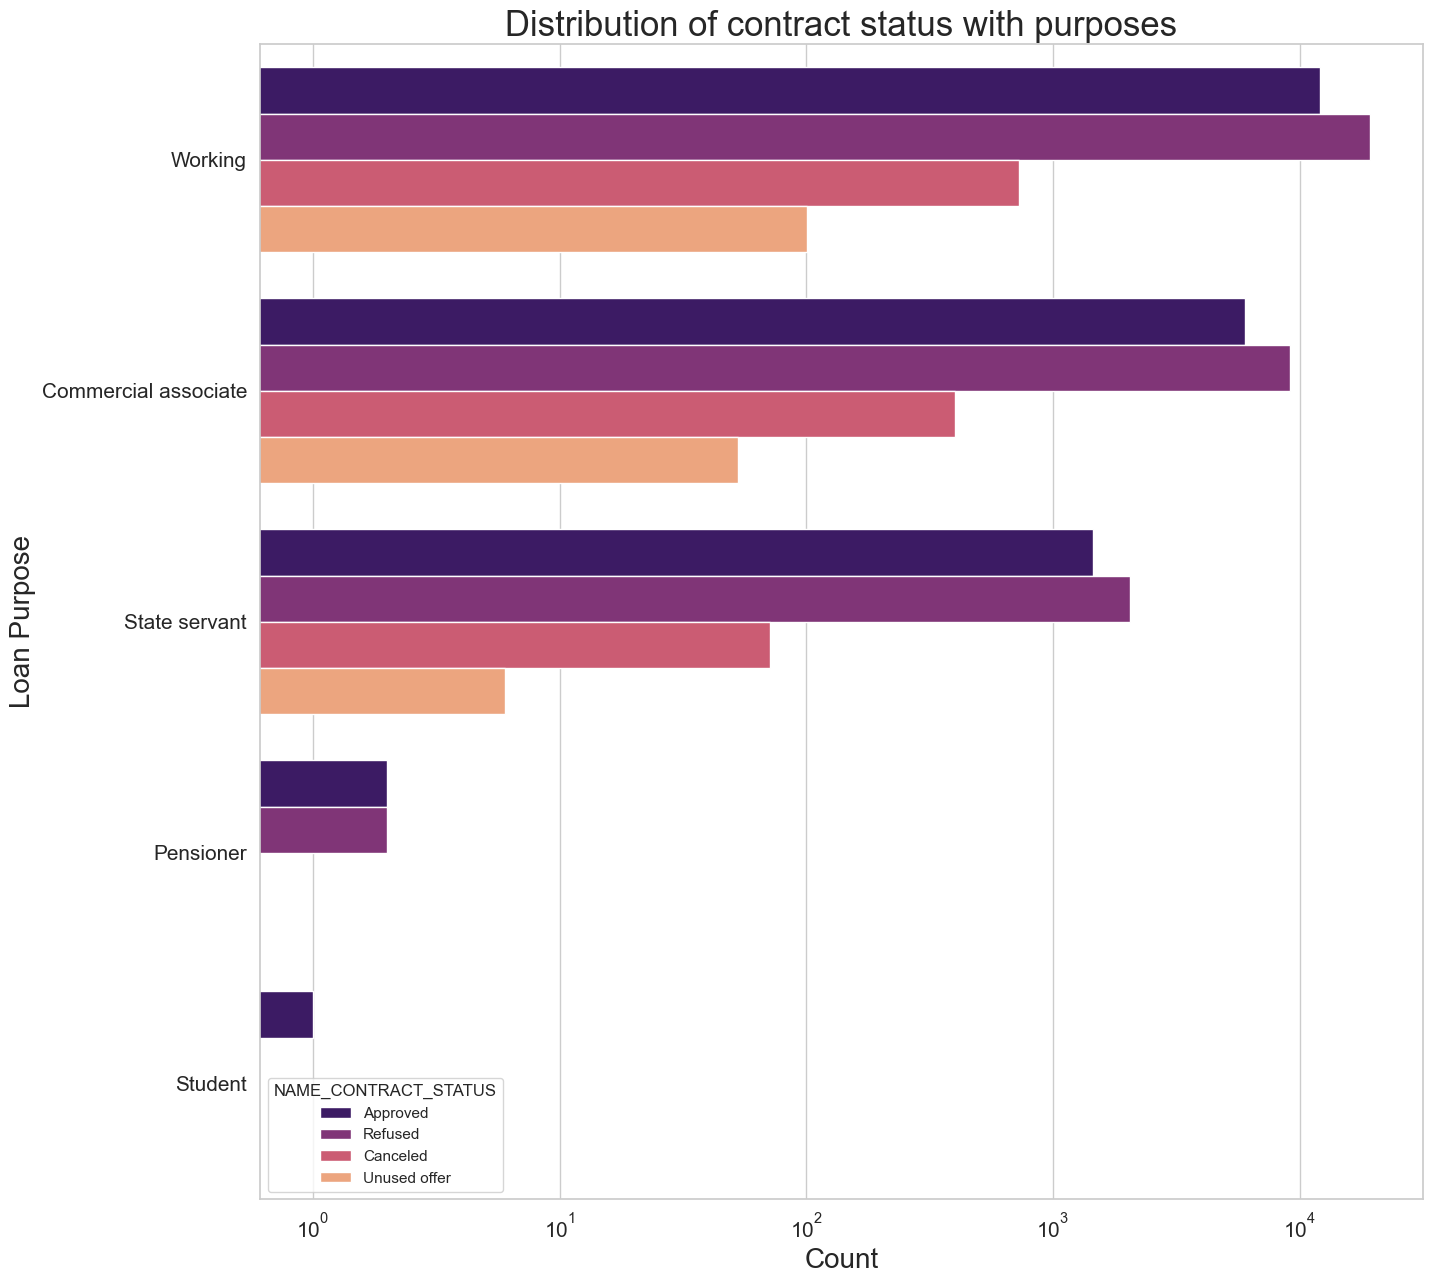

In [174]:
plt.figure(figsize=[15,15])

sns.countplot(data = loan_data, y  = 'NAME_INCOME_TYPE',order=loan_data['NAME_INCOME_TYPE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of contract status with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

The chart shows that loans for the "Working" category have the highest approval rates, indicating strong borrowing power among employed individuals. In contrast, "Student" and "Pensioner" categories face more refusals and cancellations, highlighting challenges in accessing credit. This suggests lenders should consider focusing on stable employment while finding ways to support underserved groups.

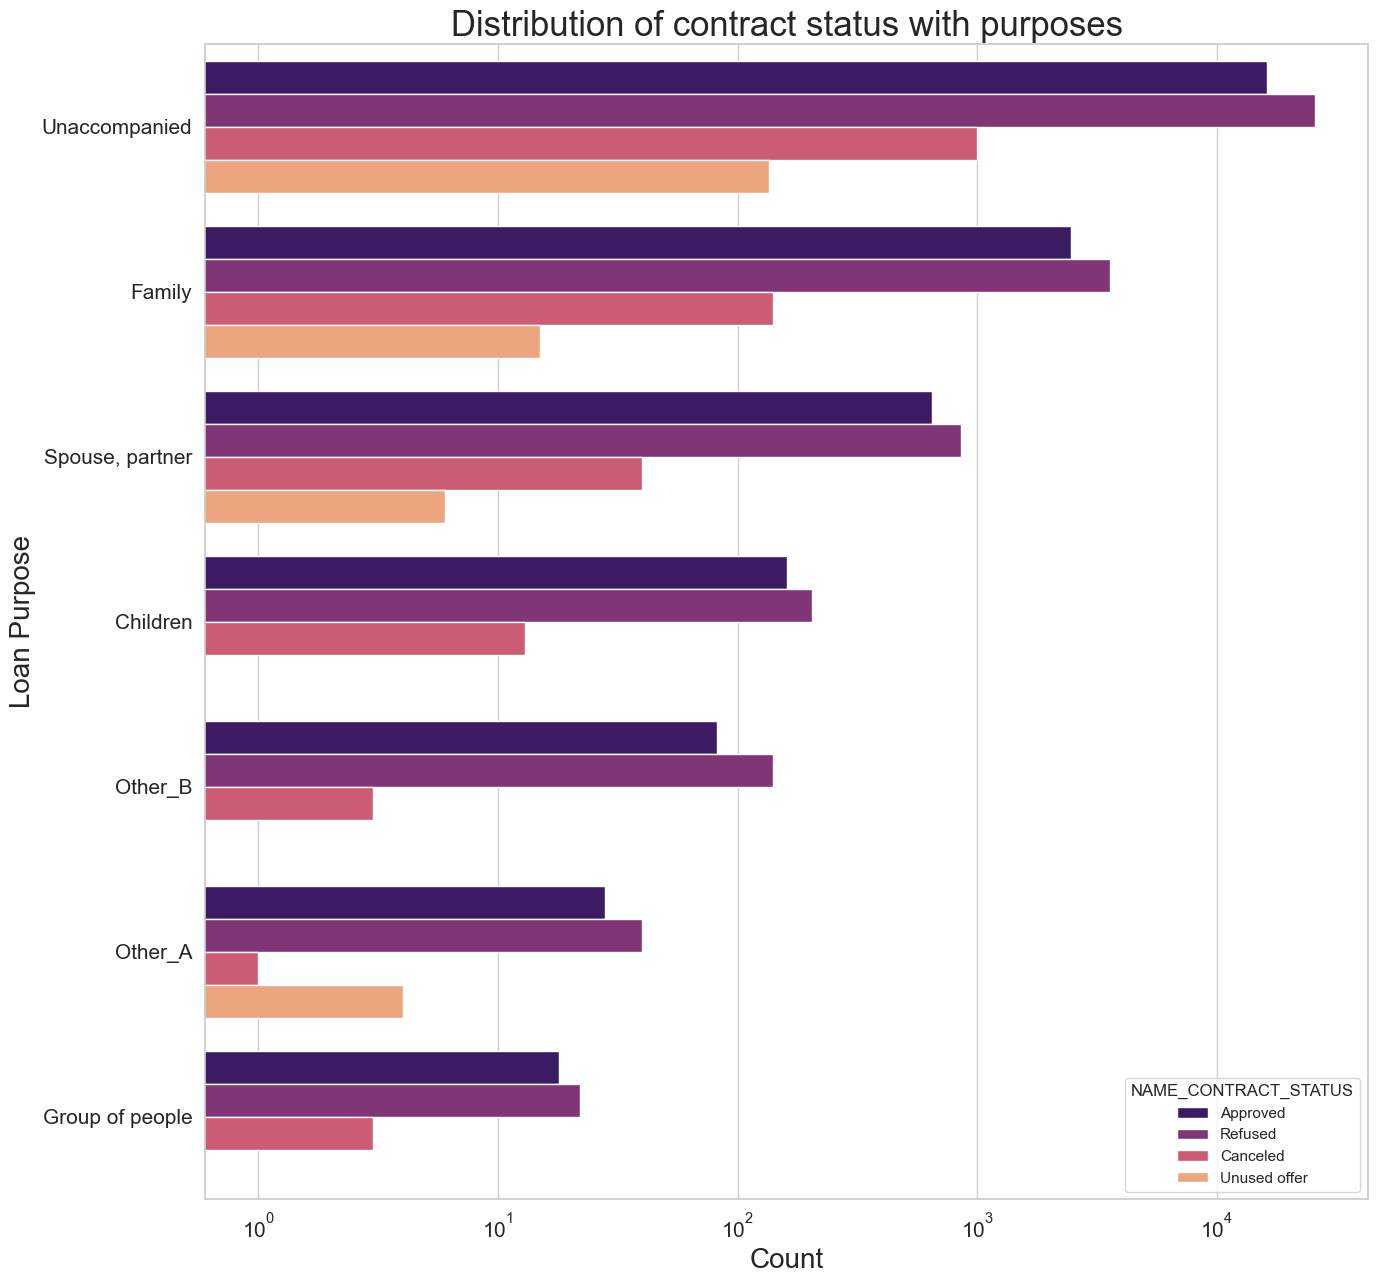

In [175]:
plt.figure(figsize=[15,15])

sns.countplot(data = loan_data, y  = 'NAME_TYPE_SUITE',order=loan_data['NAME_TYPE_SUITE'].value_counts().index, hue='NAME_CONTRACT_STATUS', palette='magma')

plt.title('Distribution of contract status with purposes', fontsize=25)

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)

plt.xlabel('Count', fontsize=20)

plt.ylabel('Loan Purpose', fontsize=20)

plt.xscale('log')

The chart indicates that loans for "Family" and "Spouse/Partner" have the highest approval rates, reflecting strong demand in personal contexts. In contrast, categories like "Group of People" and "Other" show lower approval rates, suggesting challenges for those borrowers. Lenders could enhance strategies to support underserved categories while maintaining focus on popular personal loans.



# Bivariate Analysis

Text(0.5, 1.0, 'Prev Credit amount vs Loan Purpose \n')

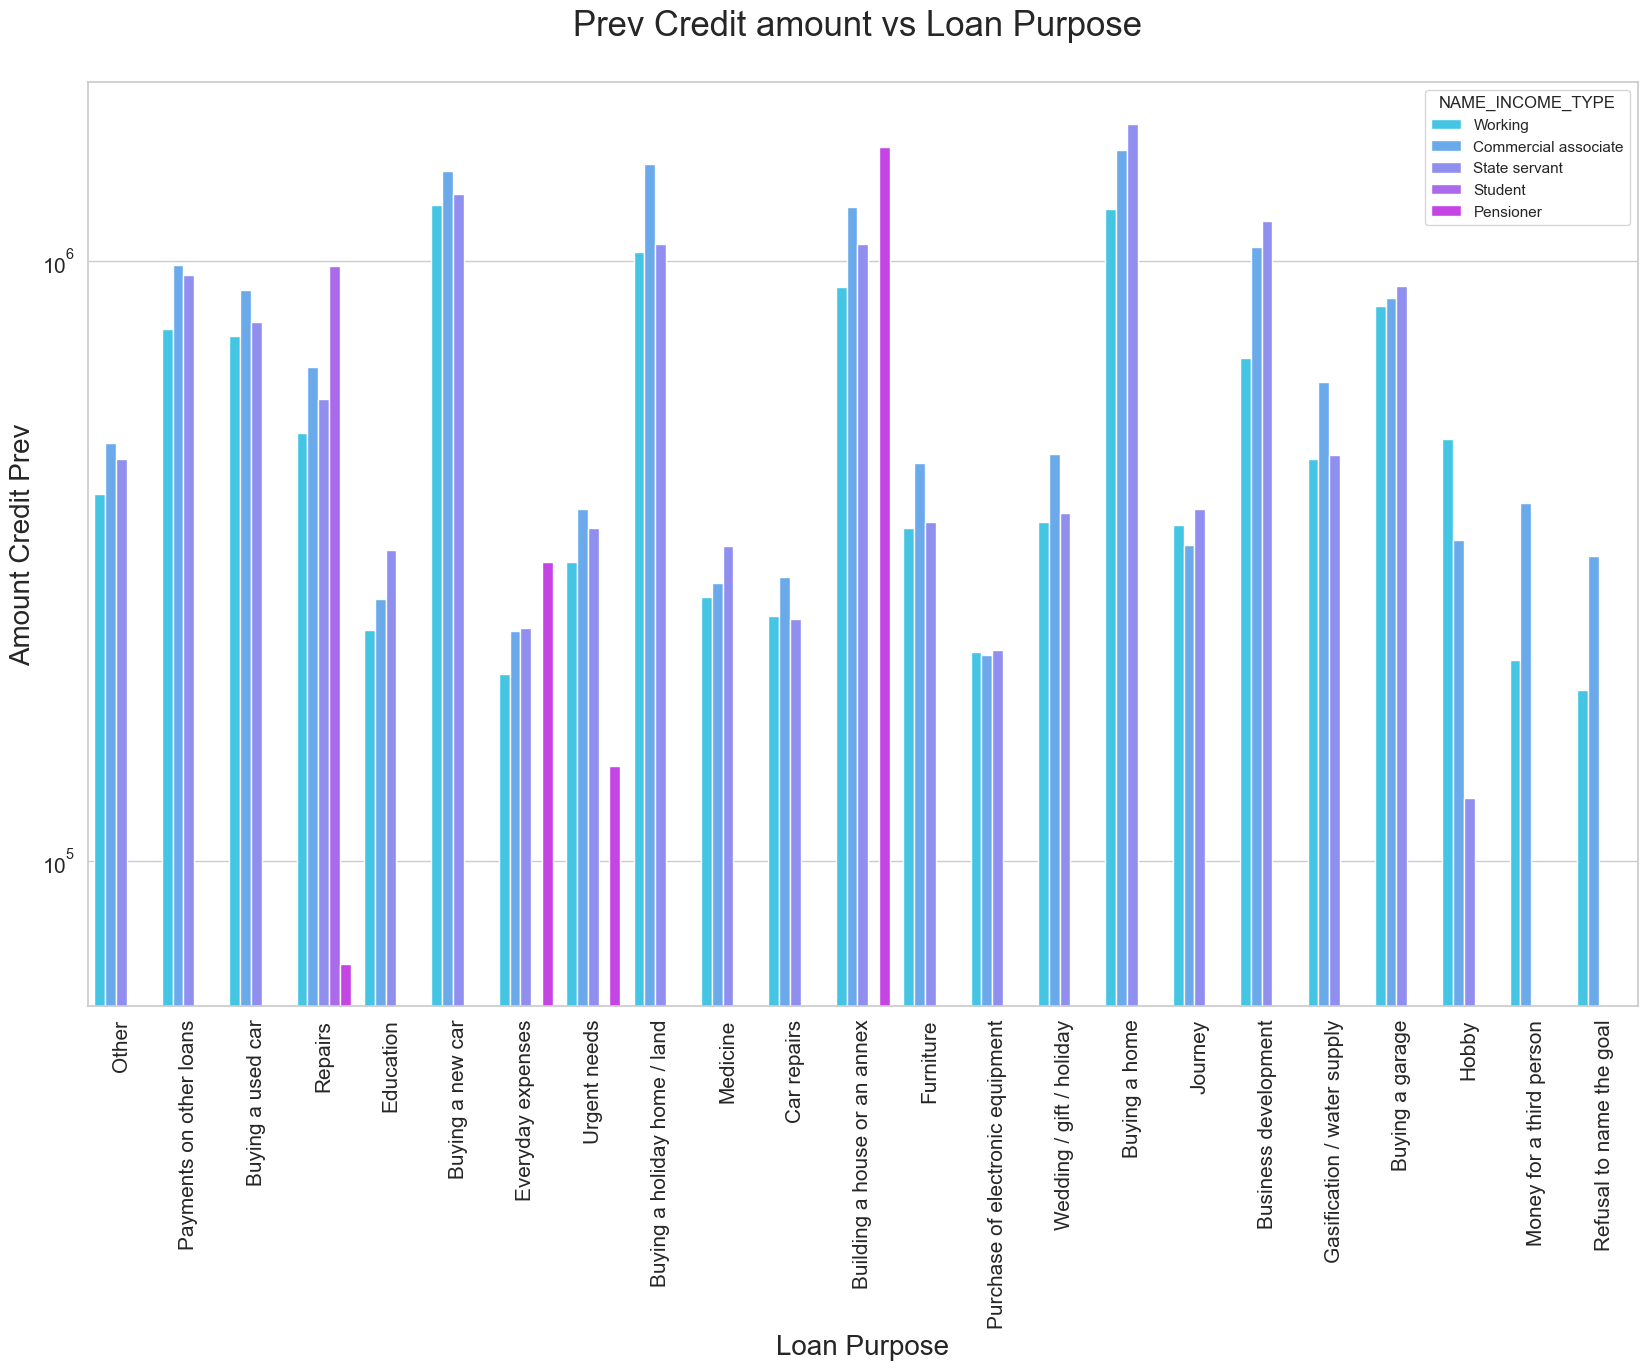

In [176]:
# Plotting for Credit amount in Logarithmic scale

plt.figure(figsize=(20,12))

sns.barplot(data=loan_data, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_PREV', orient='v', palette='cool',errorbar=None)

plt.xticks(rotation=90)

plt.ylabel('Amount Credit Prev', fontsize=20)

plt.xlabel('Loan Purpose', fontsize=20)

plt.yscale('log')

plt.xticks(fontsize=15)

plt.yticks(fontsize=15) 

plt.title('Prev Credit amount vs Loan Purpose \n', fontsize=25)

The chart reveals that "Working" and "Commercial Associate" borrowers access higher credit amounts for loan purposes like "Repairs" and "Buying a New Car." In contrast, "Students" and "Pensioners" tend to secure lower credits. "Everyday Expenses" shows notable credit amounts across income types, indicating a widespread financial need. These insights highlight the importance of tailoring lending strategies to borrower demographics and needs.

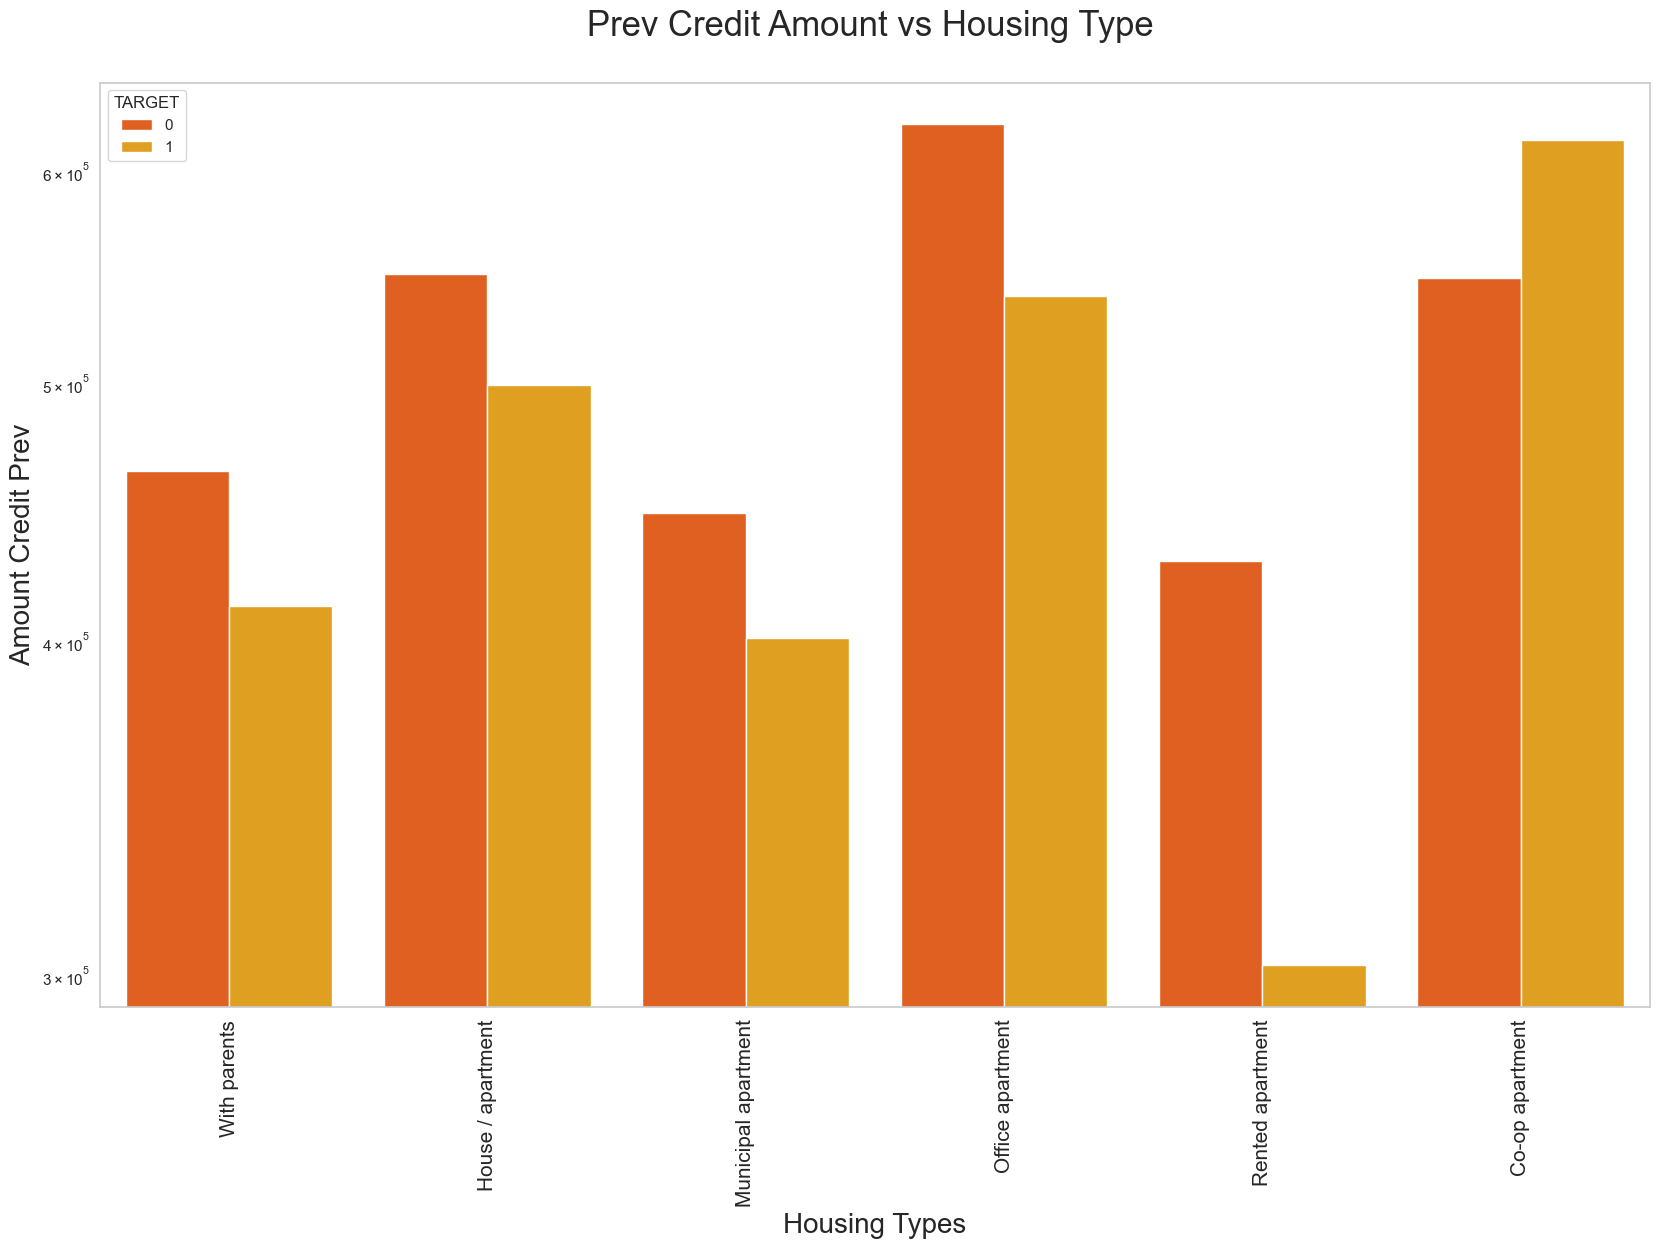

In [177]:
#plotting for credit amountprev and Housing Type


plt.figure(figsize=(20, 12))

# Barplot
sns.barplot(
    data=loan_data,
    x='NAME_HOUSING_TYPE',
    hue='TARGET',
    y='AMT_CREDIT_PREV',
    palette='autumn',
    errorbar=None
)

plt.xticks(rotation=90)

plt.ylabel('Amount Credit Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)

plt.yscale('log')

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Prev Credit Amount vs Housing Type \n', fontsize=25)

plt.show()


The chart indicates that borrowers "With Parents" and in "House Apartments" have the highest previous credit amounts, suggesting greater financial stability. In contrast, "Rented" and "Co-op Apartments" show lower credit amounts, reflecting potential limitations in access to credit. Municipal and office apartments fall in between. These findings suggest that housing type influences creditworthiness and access to loans.

#  Summary of EDA Analysis
### Data Cleaning
Application Dataset:

Missing values were imputed, with special focus on numerical and categorical columns.
Columns irrelevant to the analysis were removed.
Bin ranges were created for variables such as AMT_INCOME_TOTAL and AMT_CREDIT to allow better categorical grouping.
Data inconsistencies in features like gender and organizational types were addressed.
Previous Applications Dataset:

Similar cleaning steps were applied, and this dataset was merged with the application data for enriched analysis.

### Univariate Analysis
Target Variable: Significant imbalance observed, with Target 0 (loan repaid) far outnumbering Target 1 (loan difficulties).

Income Ranges: 250k-300k had the highest credit applications; females slightly outperformed males.

Gender and Credit: Females applied for more credits, particularly "Cash Loans."

Loan Purposes: Common purposes included "Repairs," "Everyday Expenses," and "Buying Used Cars."
### Bivariate Analysis
Correlations:
Strong correlation: AMT_INCOME_TOTAL & AMT_CREDIT.
Moderate: DAYS_BIRTH & DAYS_EMPLOYED.
Weak: CNT_CHILDREN & REG_CITY_NOT_WORK_CITY.

##### Key Graph Insights:

Working individuals and state servants had higher credit counts.
Females dominated higher credit ranges.
"Cash Loans" outnumbered "Revolving Loans."
Loan Purpose & Income: Working clients accessed more credit for repairs, while students/pensioners faced challenges.
### Multivariate Analysis
Family & Education: Higher education and family statuses ("Married," "Civil Marriage") linked to greater credit access and income stability.

Housing Influence: Borrowers "With Parents" or in "House Apartments" accessed more credit, while "Rented" or "Co-op Apartments" showed lower credit levels.

Outliers: AMT_INCOME_TOTAL and AMT_CREDIT had significant outliers, mostly concentrated in the lower quartiles.

## Key Findings and Conclusions
###### Credit Behavior Insights:
Working women dominated credit applications, especially for "Cash Loans."

Business-oriented organizations and governmental sectors showed a higher tendency for credit applications.
#### Loan Purposes:
Loans for "Repairs" and "Everyday Expenses" were most common, with "Education" and "New Car" loans trailing.

#### Target Group Analysis:
Clients facing loan repayment challenges (Target = 1) tended to have lower incomes and less credit access.
### Visualizations
Several bar charts, scatter plots, and box plots were utilized to illustrate income distribution, gender comparison, loan purposes, and outliers effectively.